# Personal Loan Campaign Modelling for AllLife Bank

## Problem Statement 

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objectives 

    1) To predict whether a liability customer will buy a personal loan or not.
    
    2) Which variables are most significant.

    3) Which segment of customers should be targeted more.


### 1) Importing all Required Libraries

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### 2) Loading CSV and reading data into a dataset

In [452]:
datasetName = "Loan_Modelling.csv"
loanData = pd.read_csv(url)
loanData.head(10) #several missing values!

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

#### Shape of the Loan DataSet

In [226]:
loanData.shape

(5000, 14)

There are `5000` Loan records in the dataset each with `14` features. 

#### Check if any columns have Null Value 

In [55]:
loanData.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

The dataset `doesn't` have any `null` values. That's good. However we need to analyze data deeper to check the presence of `absent` values. 

#### Checking for duplicates 

In [14]:
# Check for the duplicates

print(
    f"There are total {loanData.duplicated().sum()} duplicate entries in the dataset provided"
)

There are total 0 duplicate entries in the dataset provided


**Check the data types of the columns for the dataset.**

In [9]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing or String values in the dataset. All the features are either integer or float. This is really good for building Decision Tree

### Summary of the Dataset 

In [227]:
loanData.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations based on the statistics above -**

1) Customer population varies from minimum of 23 years to a max 67 Years, with mean customer age as 45.33. 

2) There are some negative values for Experience. We need to analyze this column futher. 

3) Income of customer base varies from 8K Dollars per month to 224K Dollars per Month. There's a huge variation in the income distribution with possible outliers. (Skeweness in data)

4) Zipcode. Most of zipcode (75%) belong to state of California. I made this conclusion because zip code range (min and 75% ) belong to State of California based on <a href="http://www.structnet.com/instructions/zip_min_max_by_state.html">this</a> public data. However there may be few out of range zipcodes for California state and we need to check for their validity. 

5) Customer demographics shows that there are single customers and customers with family members. However max family members of customers are 4. 

6) Average monthly Credit Card expenditure of the customer base is 1.74K Dollars, with maximum value of 10K Dollars. The minimum is 0, which could mean missing values or genuinely 0 Credit card expenditure. We will know more in the EDA. 

7) Customer's have various education level, UnderGrades, Graduate and Professional levels. Mean is just above UnderGrade level. 

8) Some customers have high mortageg balance while some customers have 0 mortgage values. 

9) Most of the customers (75 % or more) didn;t accept the Pesonal Loan offered in the last campaign. 

10) Most customer (75 % or more) don't have security account and CD Account with bank. There could be high correlation between Securities_Account, CD_Account and Personal_Loan features. We need more details EDA on this. 

11) Around 50% of customers have online banking access to their accounts. 

12) Most customer's don;t have Credit Card with the banks. 



**Treating negative values in `Experience` columns**

In [235]:
##Get the mean Experience excluding Negative values

print(f"Total records with negative experience -  {loanData[loanData['Experience'] < 0]['Experience'].count()}")

print(f"Mean Experience of non negative rows - {loanData[loanData['Experience'] > 0]['Experience'].mean()}")

loanData["Experience"] = loanData["Experience"].apply(lambda x : x if x > 0 else meanExperience)

print(f"Total records with negative experience after imputing -  {loanData[loanData['Experience'] < 0]['Experience'].count()}")


Total records with negative experience -  52
Mean Experience of non negative rows - 20.60589922163048
Total records with negative experience after imputing -  0


Replaced negative values with mean of non negative Experiences from the dataset. 

## 3) EDA of the Dataset

**Defining custom functions to perform Various Univariate Analysis** 

In [242]:
def plotFeatures(plots, feature):
    
    figsize=(40, 15)
    bins=None
    
    f2, (ax_box2,ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=False,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    
    if 'boxplot' in plots :
        draw_boxplot(feature, ax_box2)
    if 'histogram' in plots :    
        draw_histogram(feature, ax_hist2,bins)
    if 'countplot' in plots :
        draw_countplot_with_count_percentage(feature)
        

def draw_boxplot(feature, ax_box2):
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

def draw_histogram(feature, ax_hist2, bins):
    sns.displot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    
    
def draw_countplot_with_count_percentage(data):
    plt.figure(figsize=(50, 15))
    ax = sns.countplot(x=data)
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        x = p.get_x() + (p.get_width() / 6)
        y = p.get_height()
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        ax.annotate(str(height) + " (" + str(percentage) + ")", (x, y))
    plt.show()    
    
    
def stacked_plot(x, y):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, y, margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, y, normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()    
    

### Univariate Analysis

**Observations on `Age`**

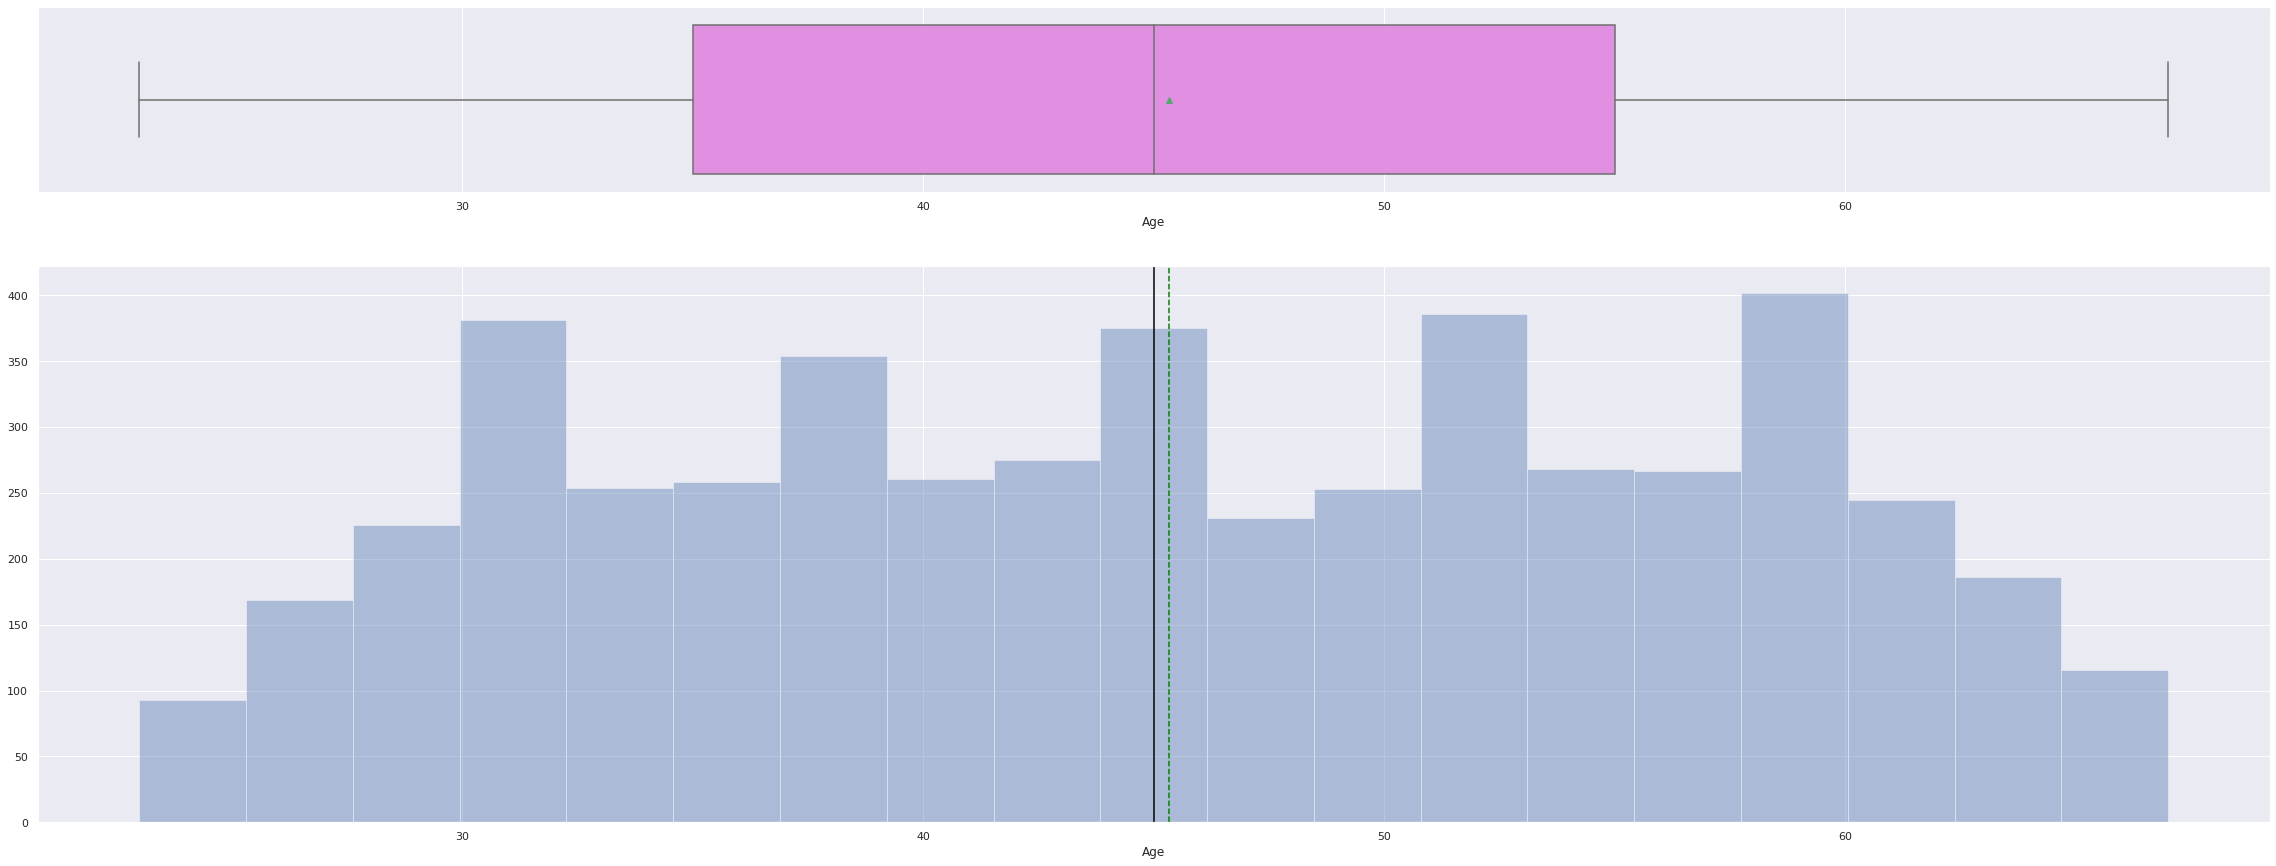

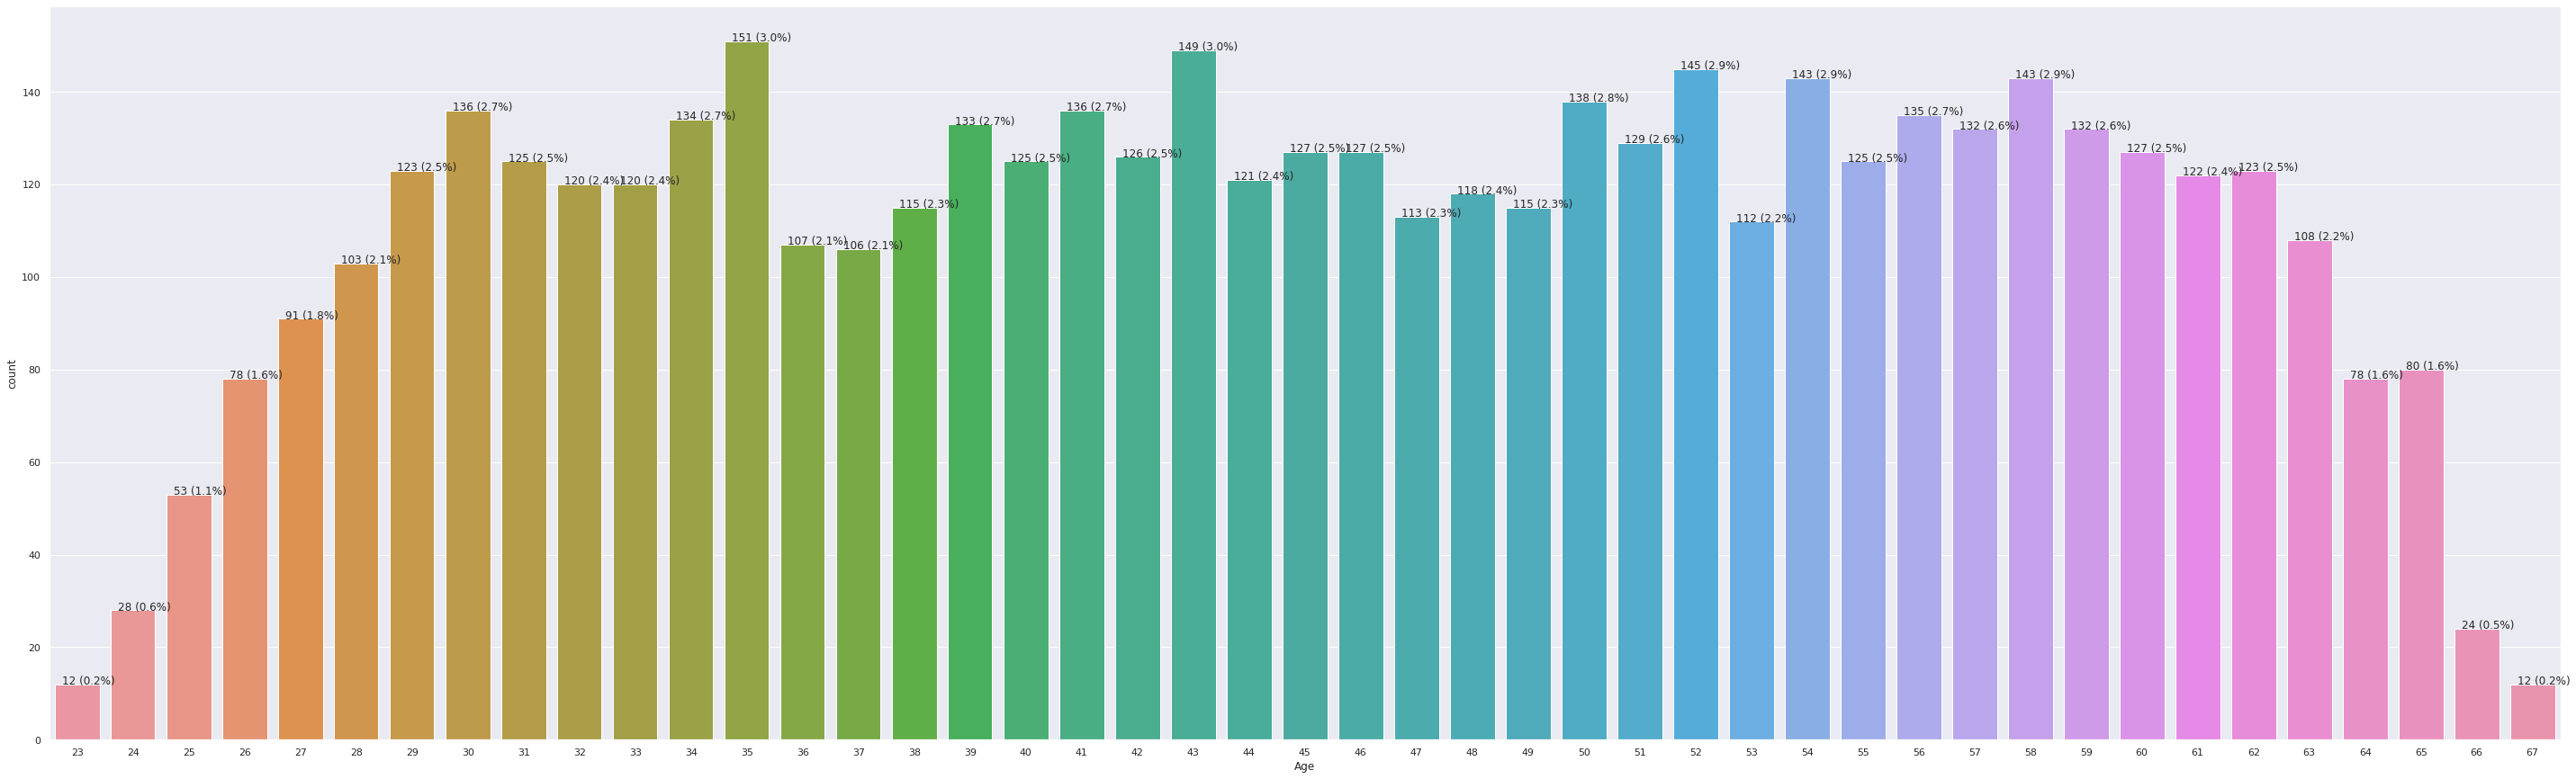

In [237]:
#histogram_boxplot(loanData["Age"])
plotFeatures(["boxplot","histogram","countplot"], loanData["Age"])

    1) Age of the customers are evenly distributed. Mean is close to the 50 Percentile. 
    2) There are no outliers in terms of customer age. 
    3) Yougest Customers are 23 year old while, oldest customers are 67 year old.
    4) As per the box plot, majority of customers are in age group of Mid Thirties (35's) to Mid Fifties (55's) 

**Observations on `Experience`**

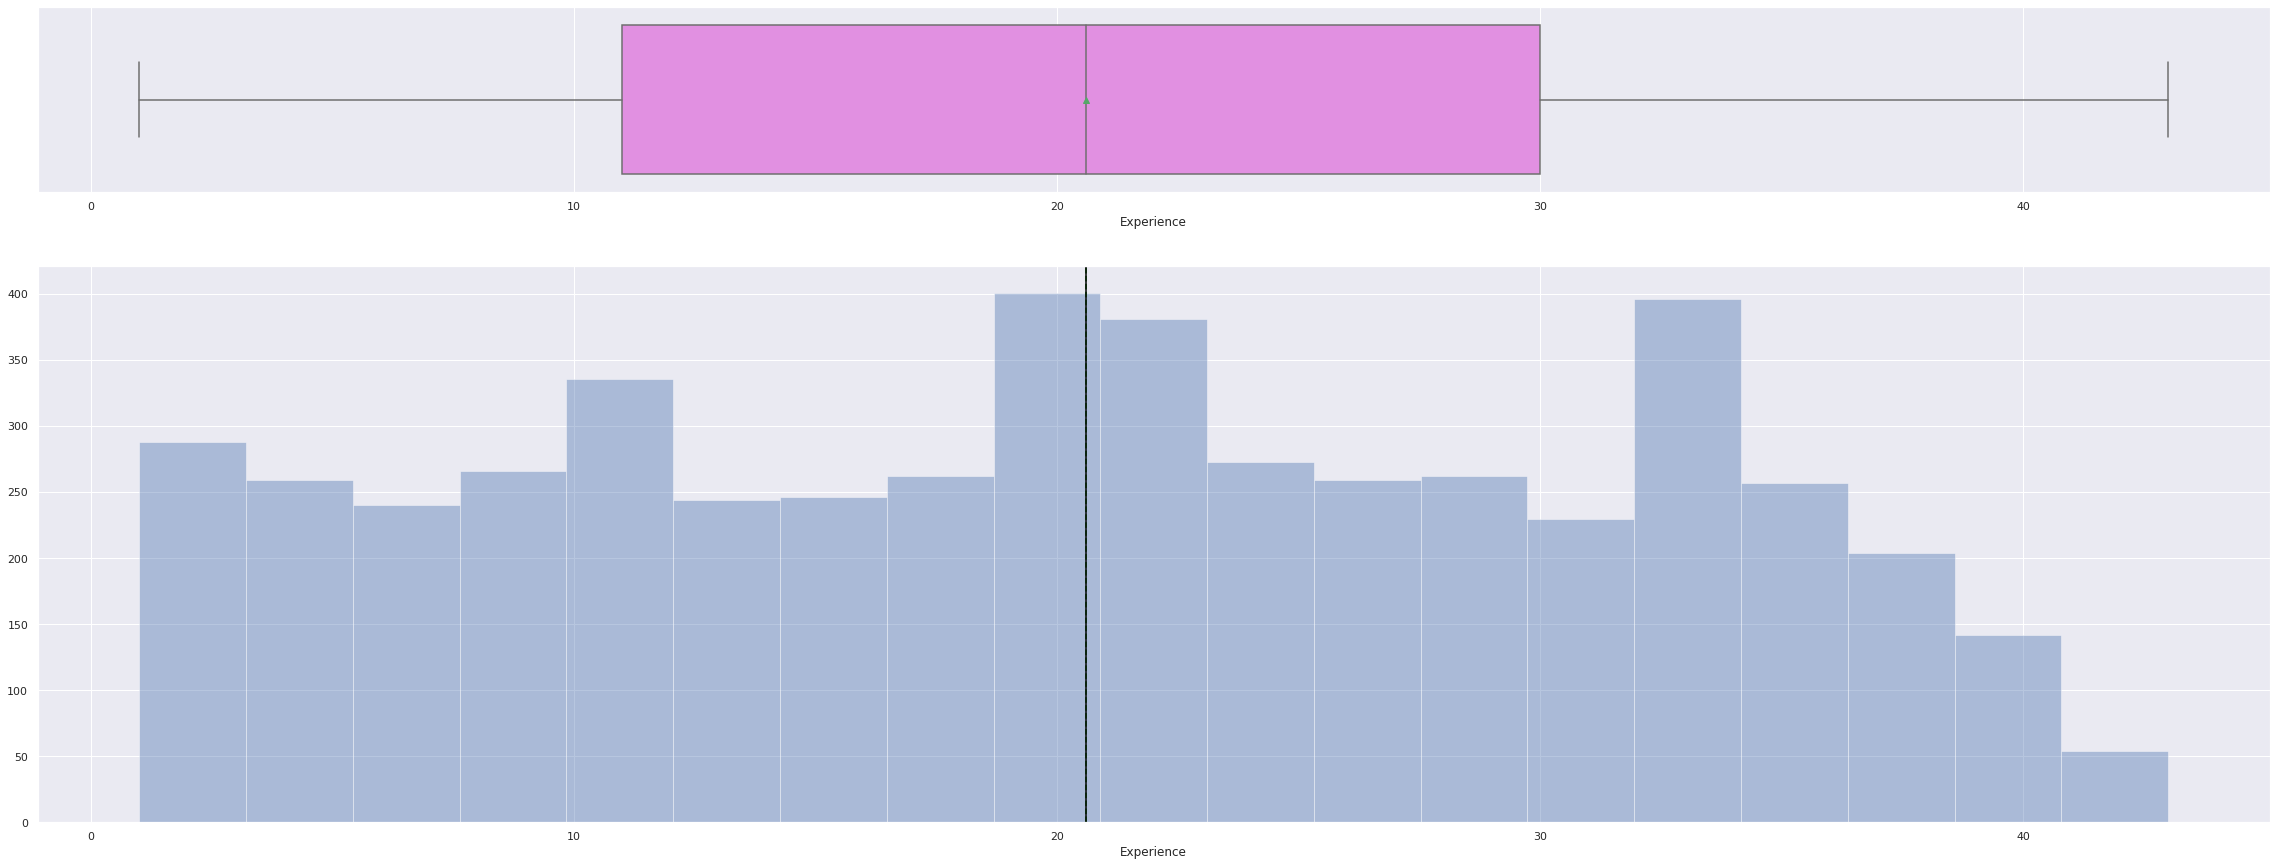

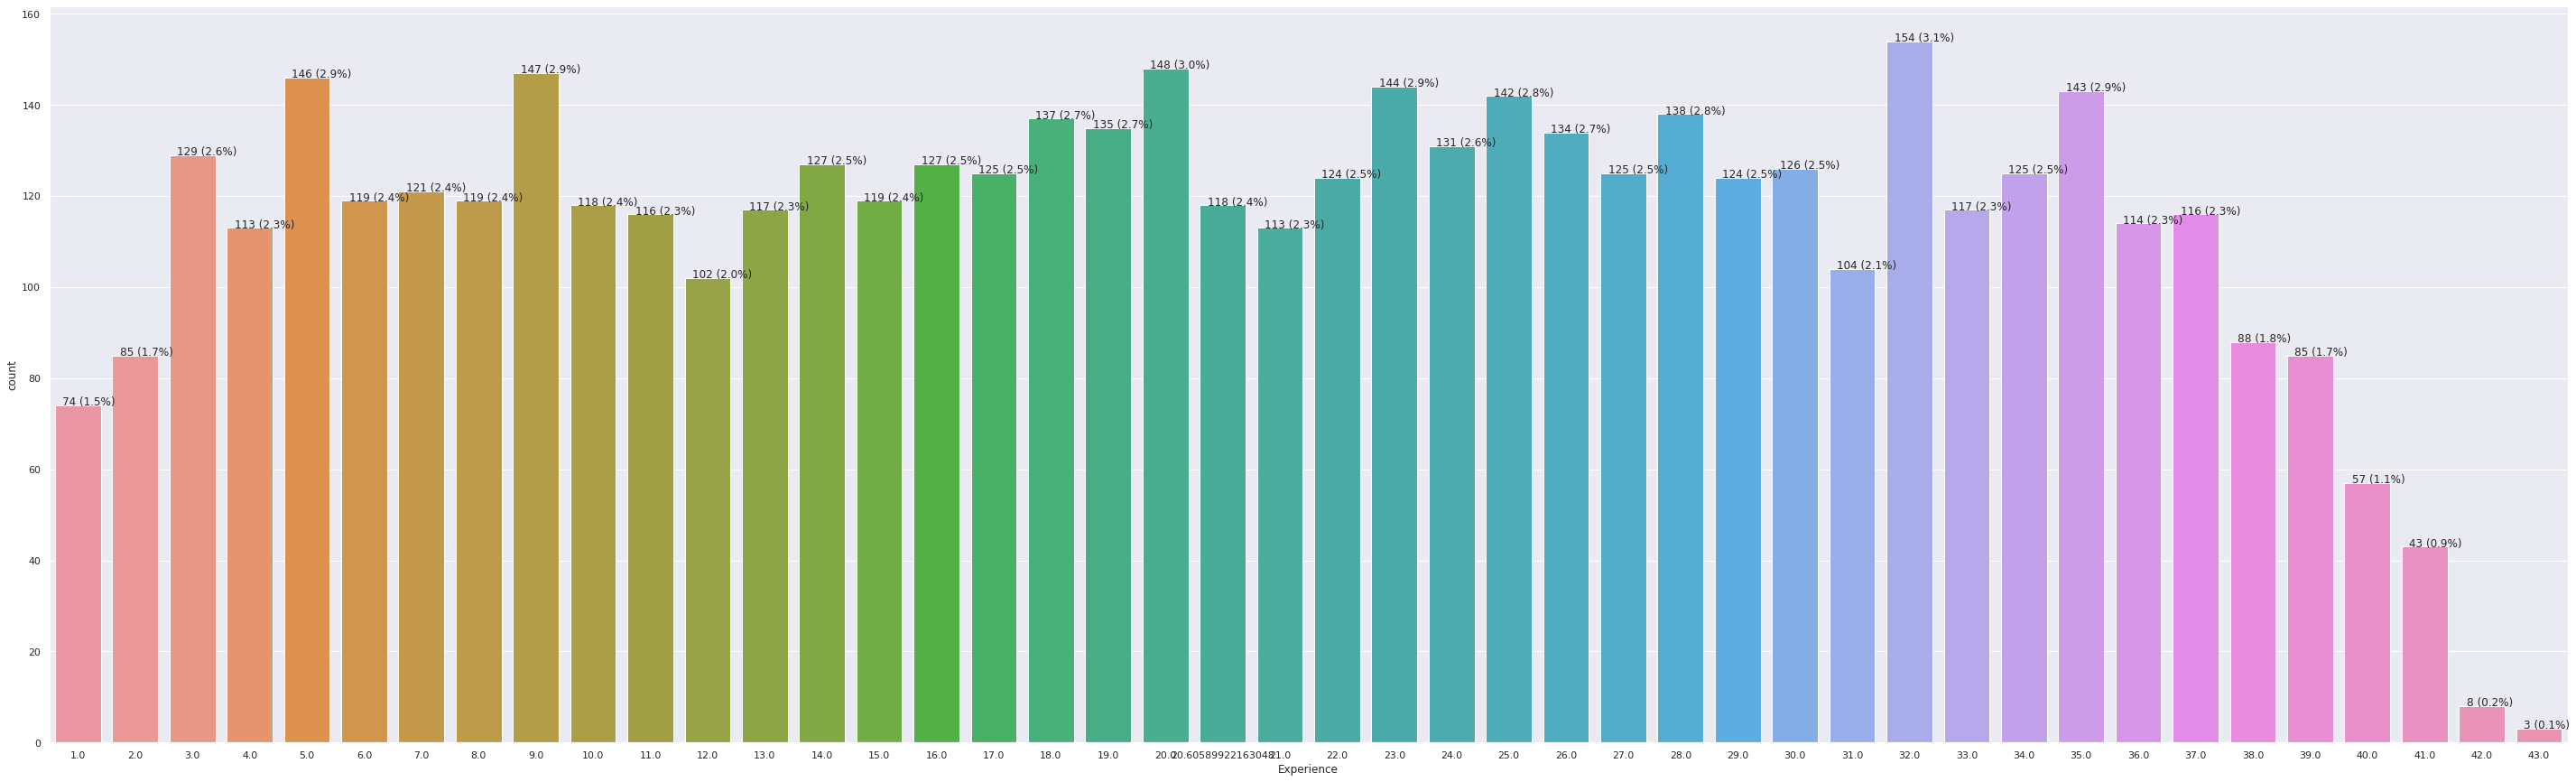

In [238]:
plotFeatures(["boxplot","histogram","countplot"], loanData["Experience"])

    1) Experience of the customer base is evenly distributed just in their. Mean is close to 50th Percentile. Will analyze further if they (Age & Experience) are highly correlated.
    2) There are no outliers in customer's experience data. 
    3) We have treated the Experience column with negative value and replaced it with mean, hence negative values are no longer represented here. 
    4) There are customers with no experience along with customers with as high as 43 years of experience.
    

**Observations on `Income`**

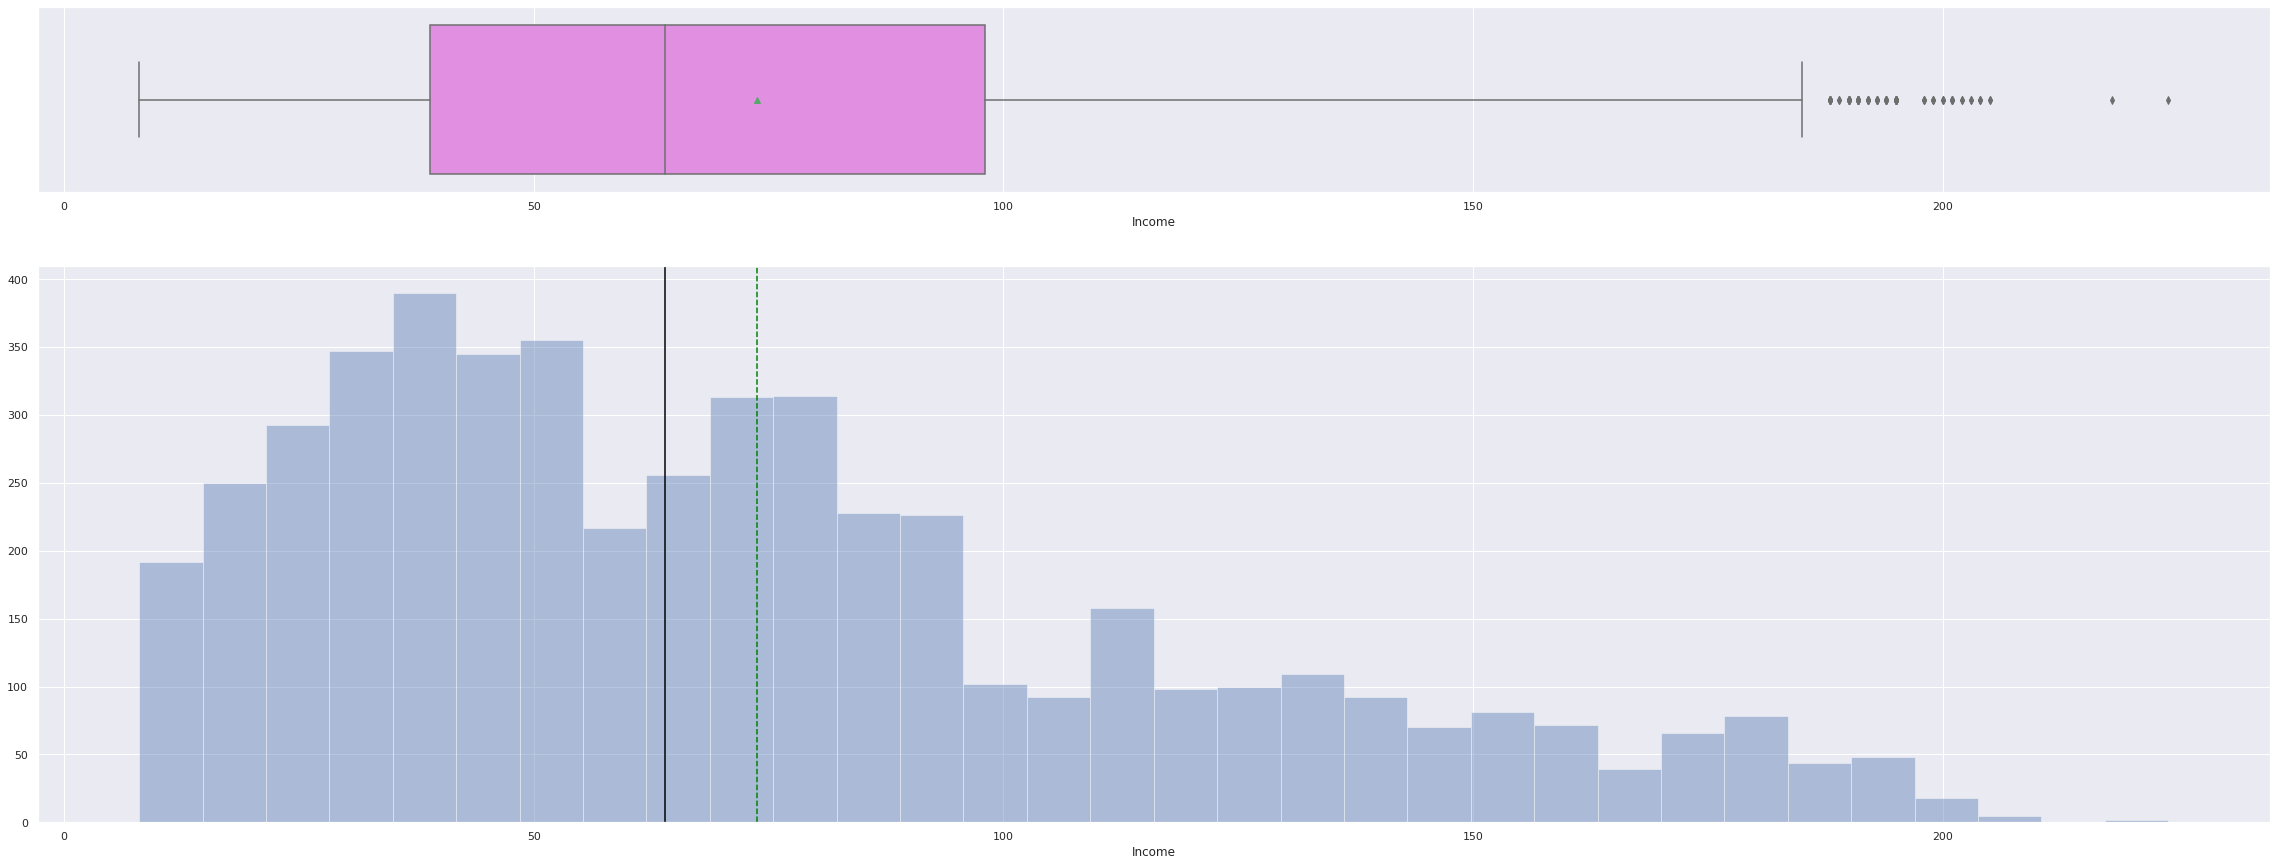

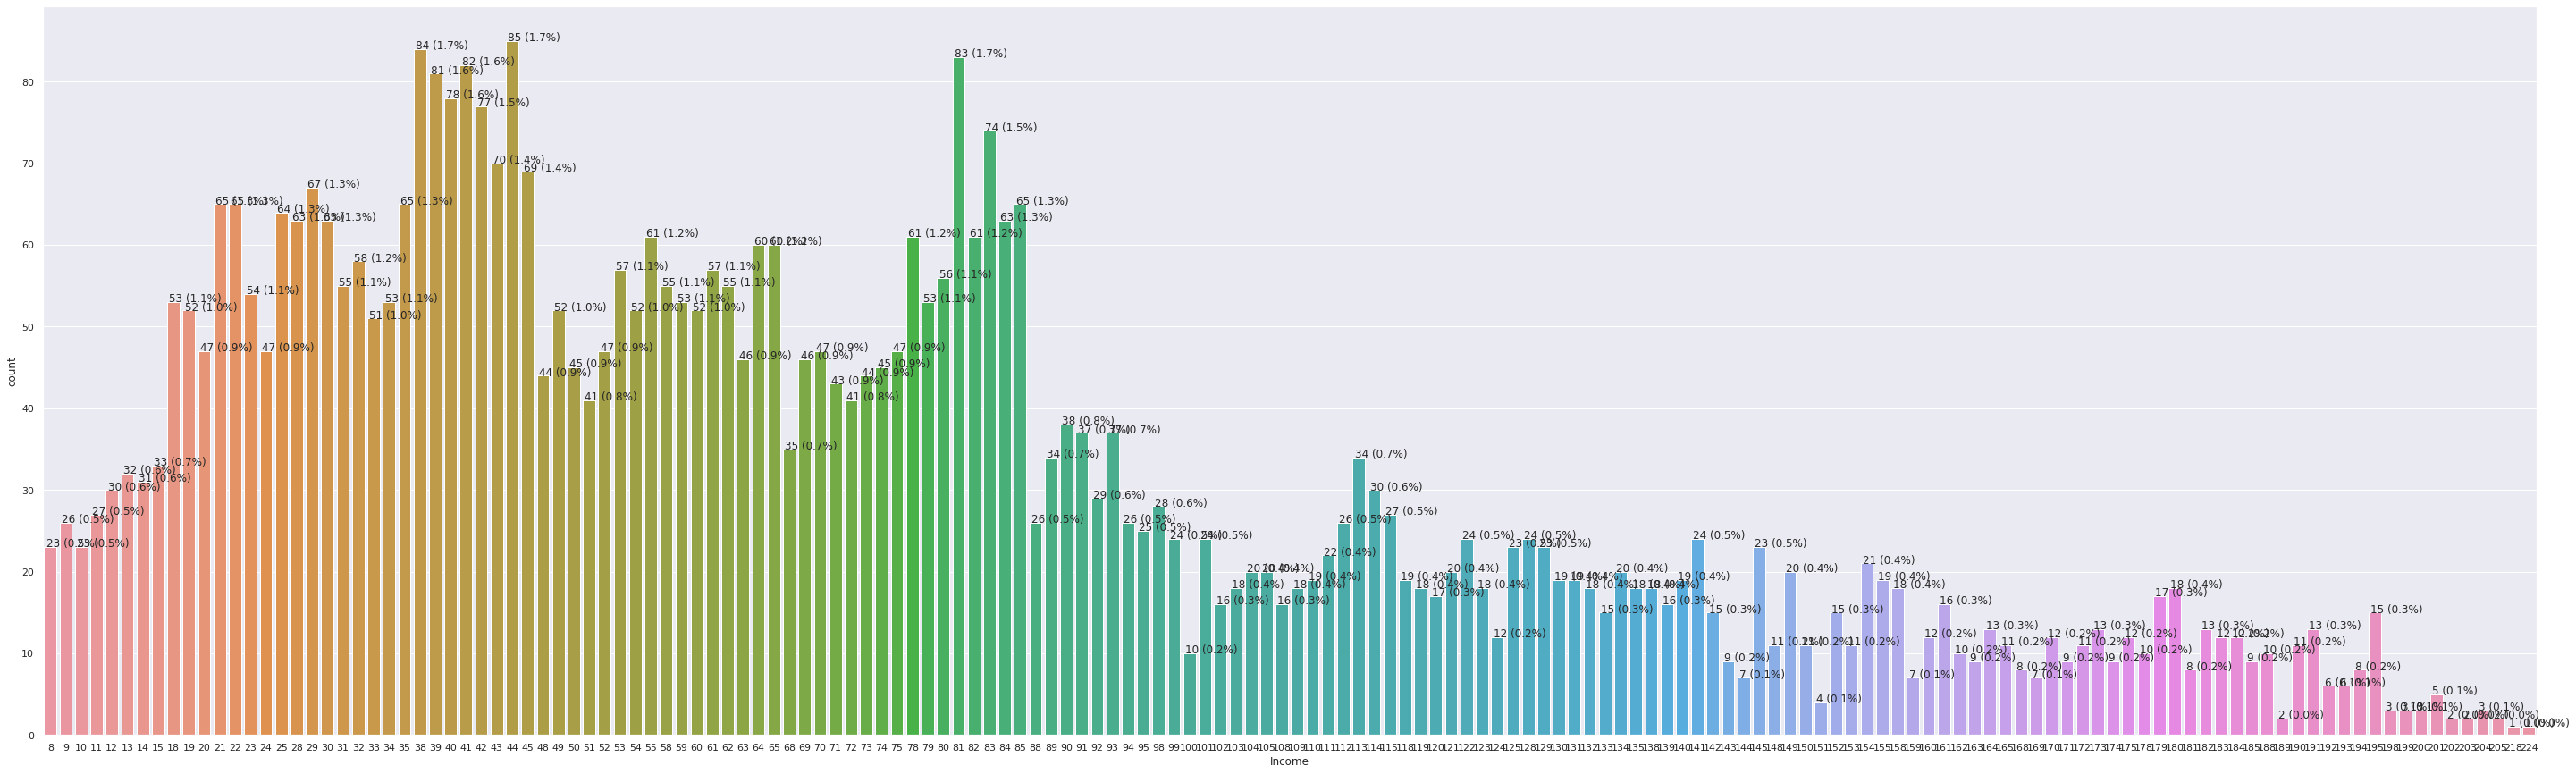

In [239]:
plotFeatures(["boxplot","histogram","countplot"], loanData["Income"])

    1) Income of customers are right skewed.
    2) There are several outliers in the income of customer base, that's dragging the mean away from 50th Percentile.
    3) Income range is pretty wide 8k to 224k per month. 

**Observing `Family`**

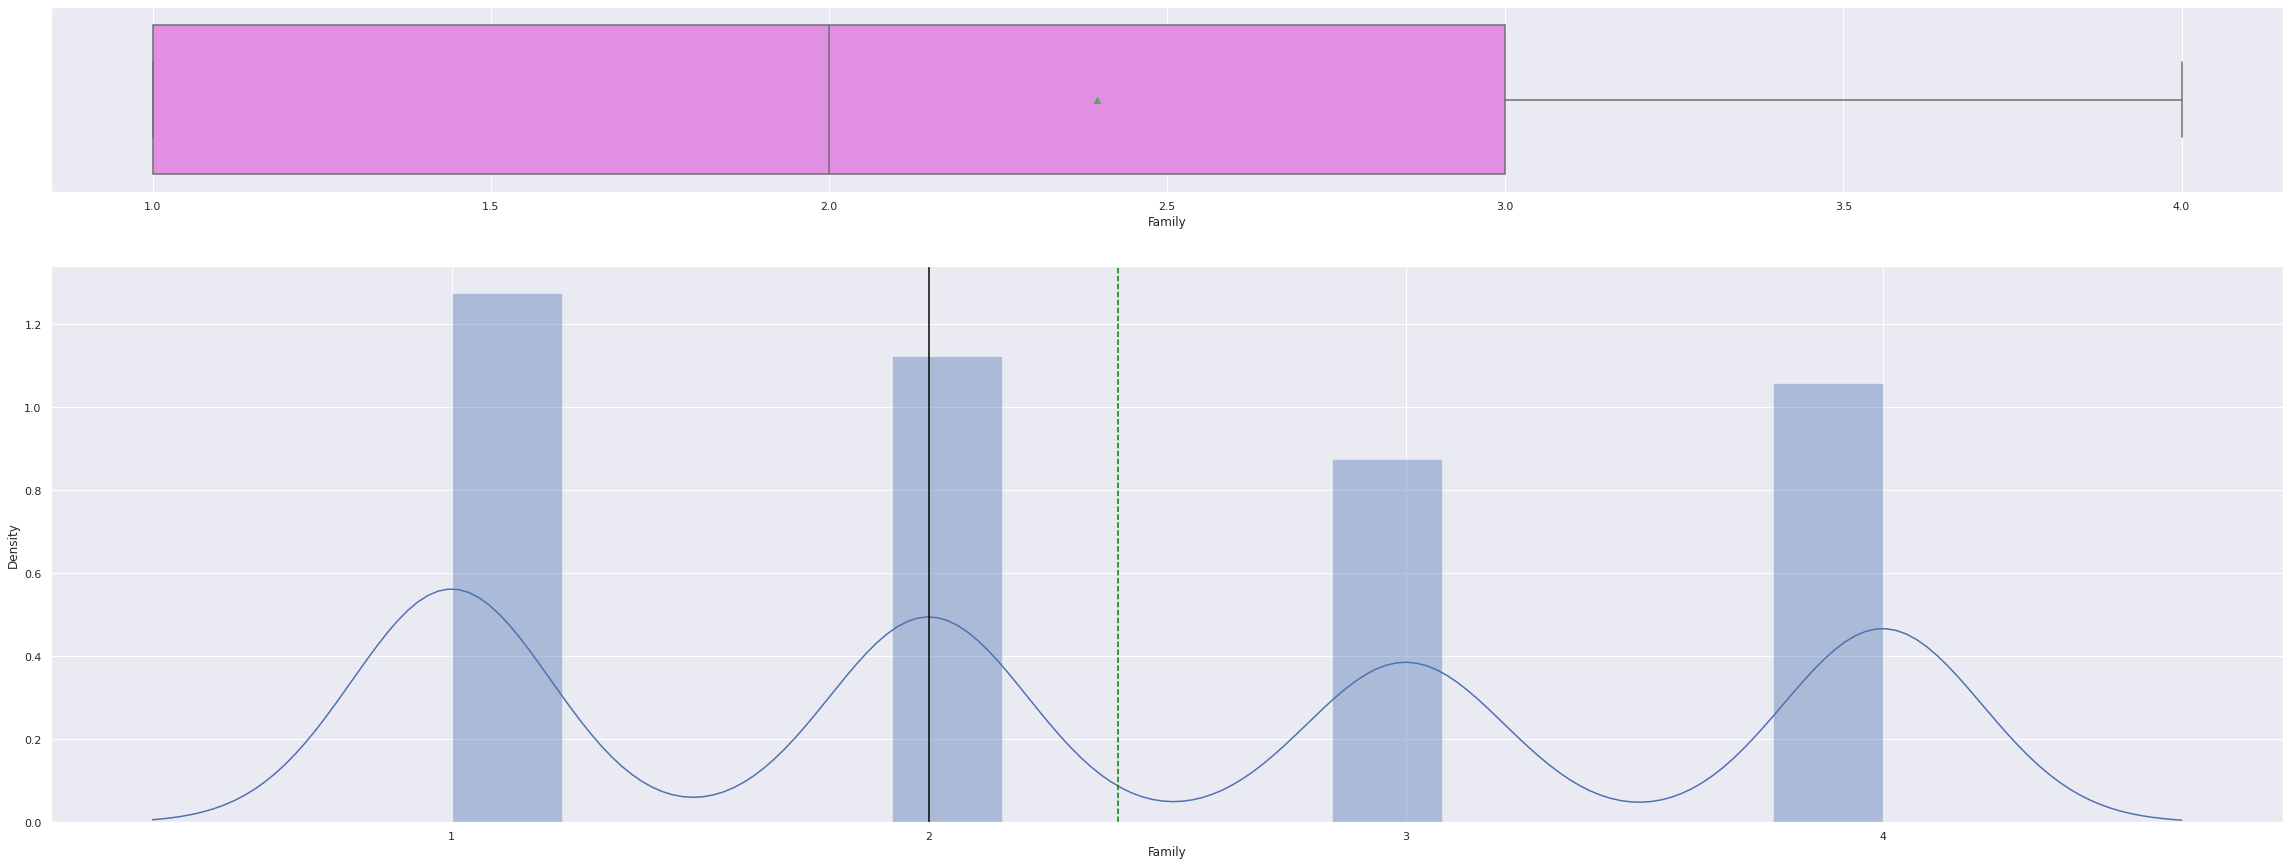

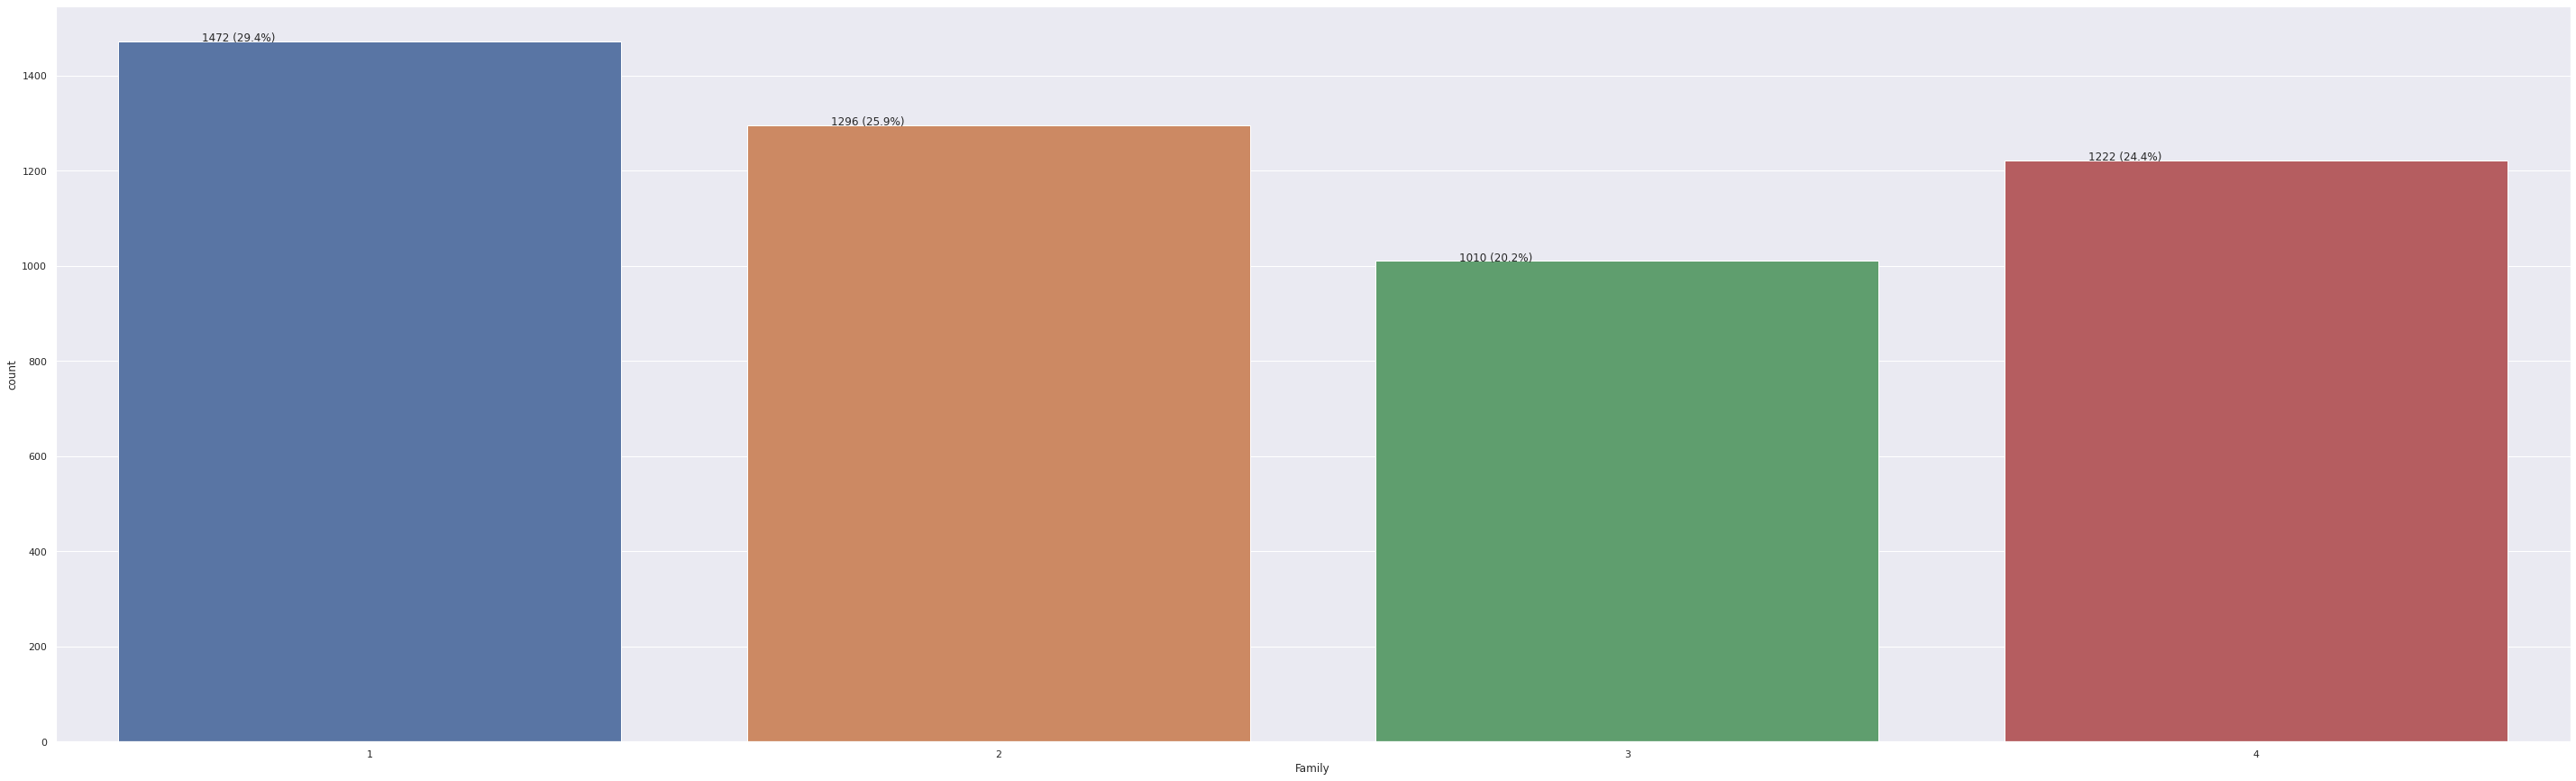

In [169]:
plotFeatures(["boxplot","histogram","countplot"], loanData["Family"])

    1) Approximately 30% of customers are single. 
    2) Approximately 25% of customers have 2 members in the family.
    3) Approximately 25% of customers have a family of 4.
    4) Approximately 20% of customer have a family of 3. 
    5) There's a good distribution of single customers and customers with family of various sizes.

**Observing `CCAvg`**

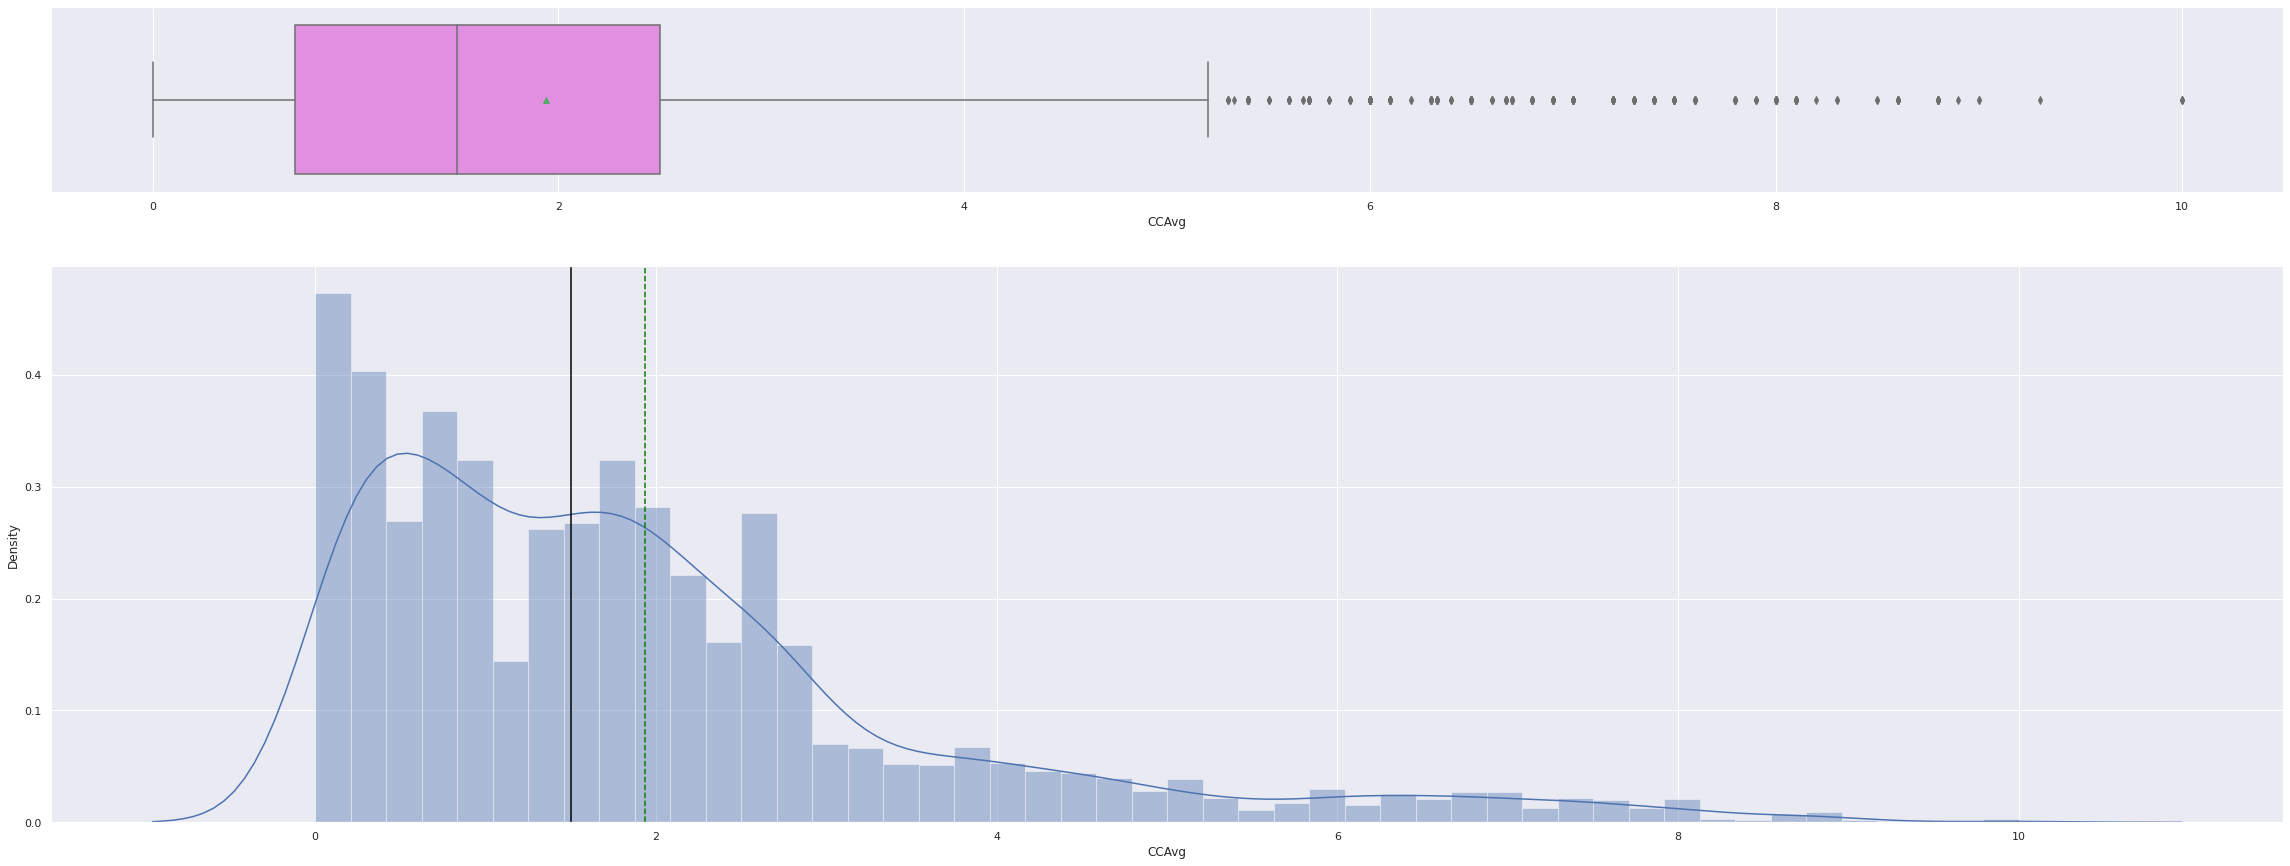

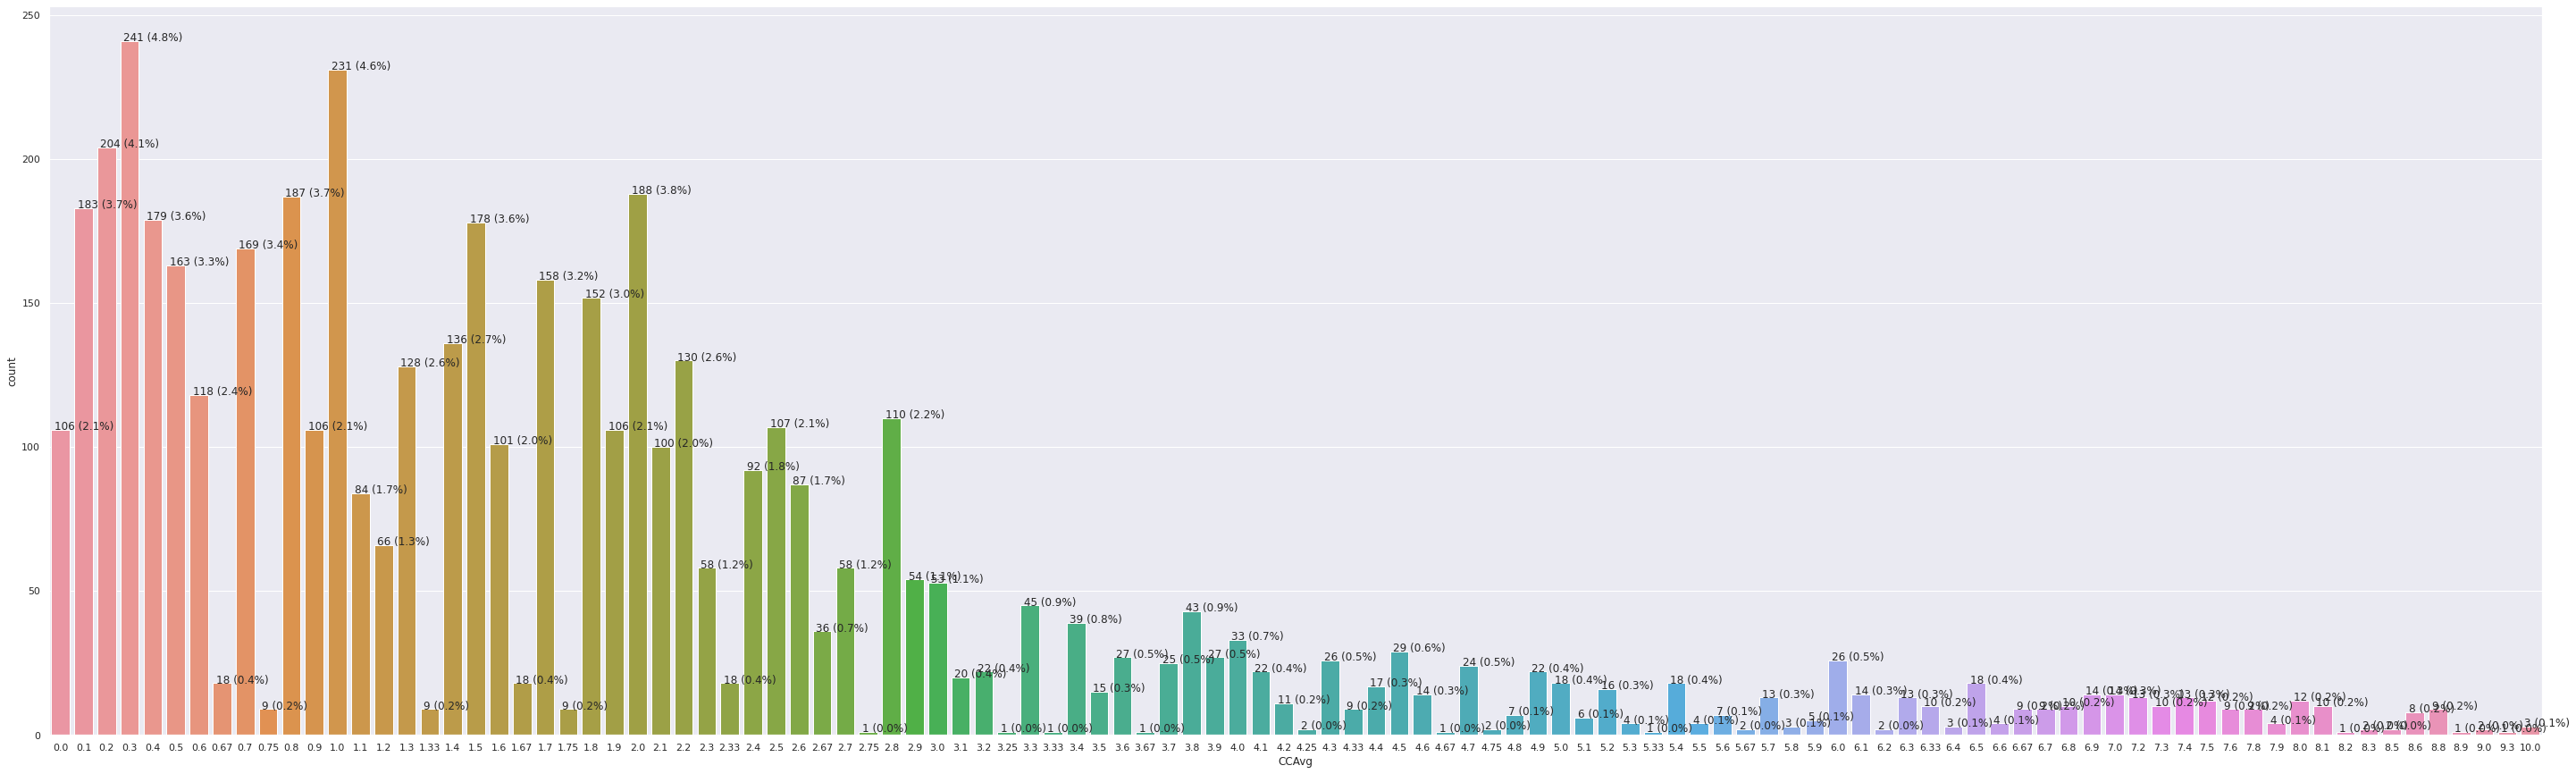

In [170]:
plotFeatures(["boxplot","histogram","countplot"], loanData["CCAvg"])

    1) Distribution of Average Credit Card balance is right skewed. There are some extreme values in the dataset( Customers with exceptionally high Credit Card Balance)
    2) There are customers with very low Credit Card balance in the dataset. 

**Observing `Education`**

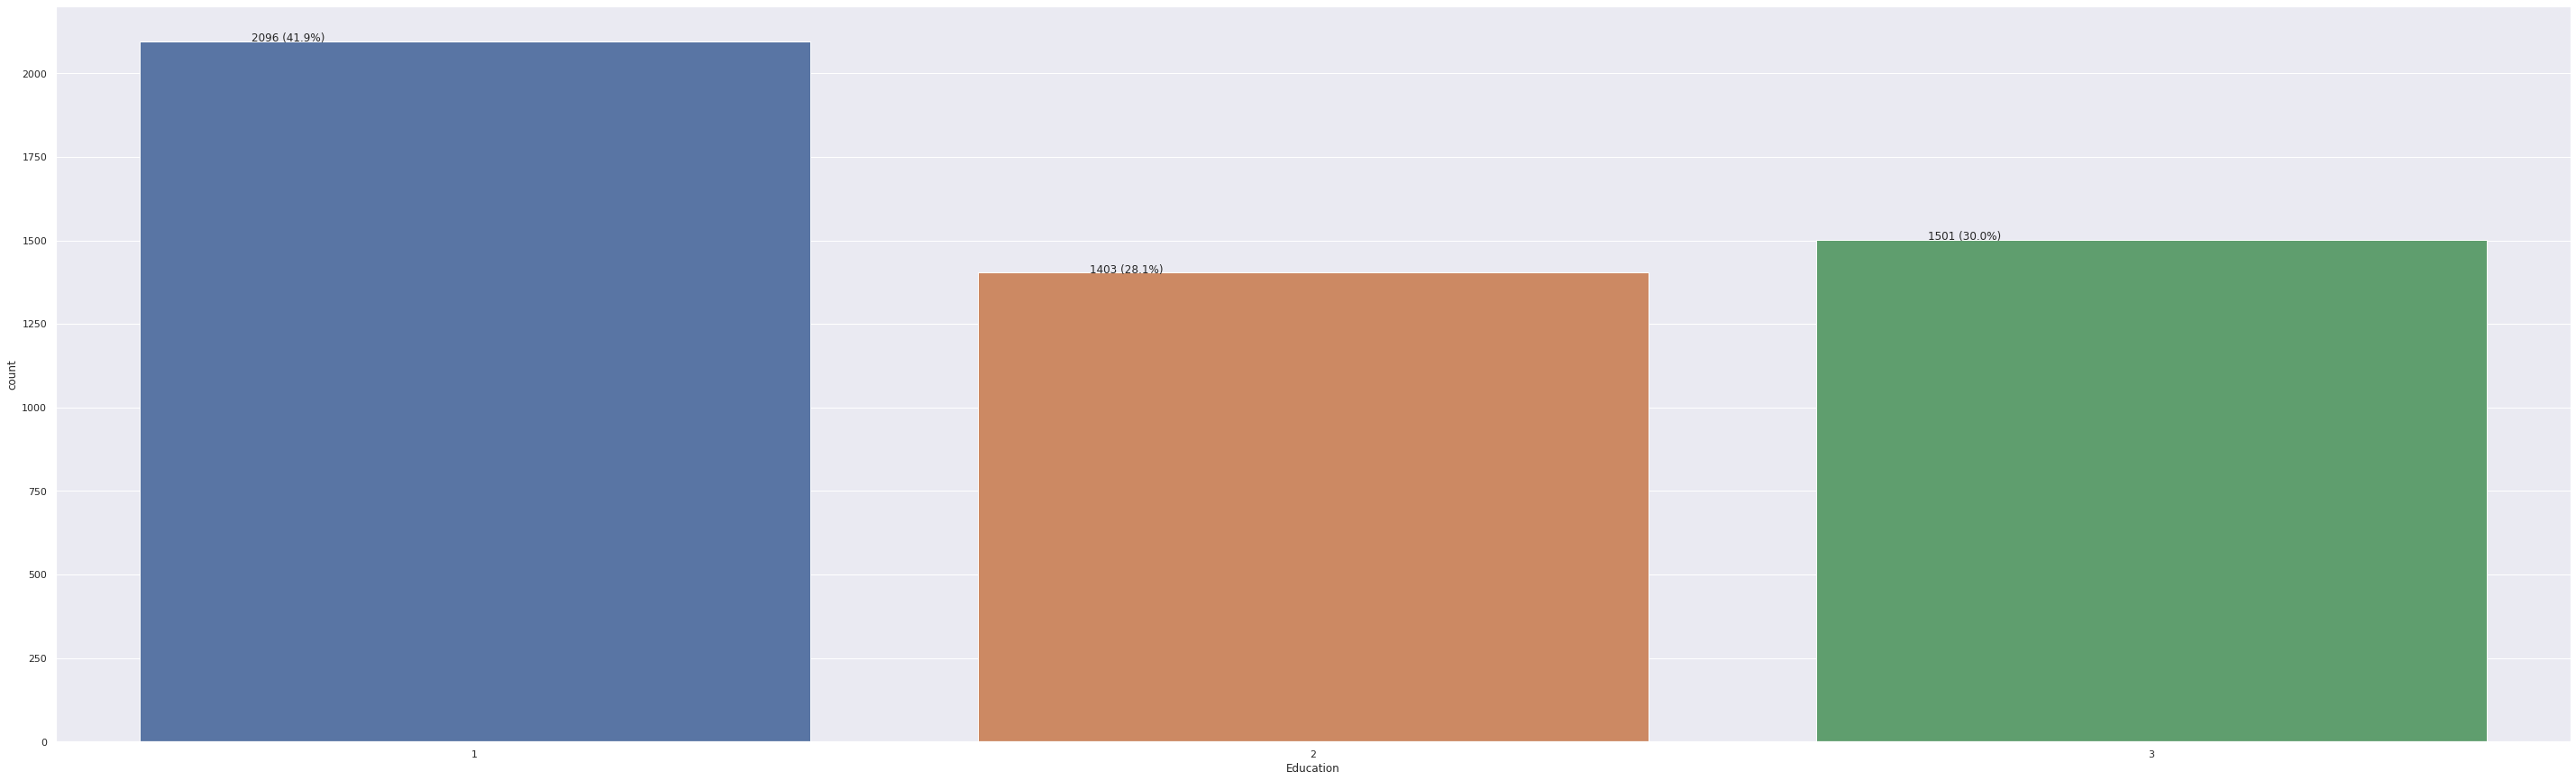

In [181]:
draw_countplot_with_count_percentage(loanData["Education"])

From the problem definition - 1: Undergrad; 2: Graduate;3: Advanced/Professional

    1) Almost 42% of the customers have Undergard degree.
    2) Most (58%) of the customers have education of Graduate or above level. 
    3) 30% of customers have Advanced/Professional level of education. 
    4) 100% of customers have at least Undergrad or above level of education.
    5) We can infer that most of the customers who had Graduate level of education went ahead with Advanced/Professional education ( Note* - I am making an assumption that Advanced/Professional education level is higher than Graduate)
    

**Observing `Mortgage`**

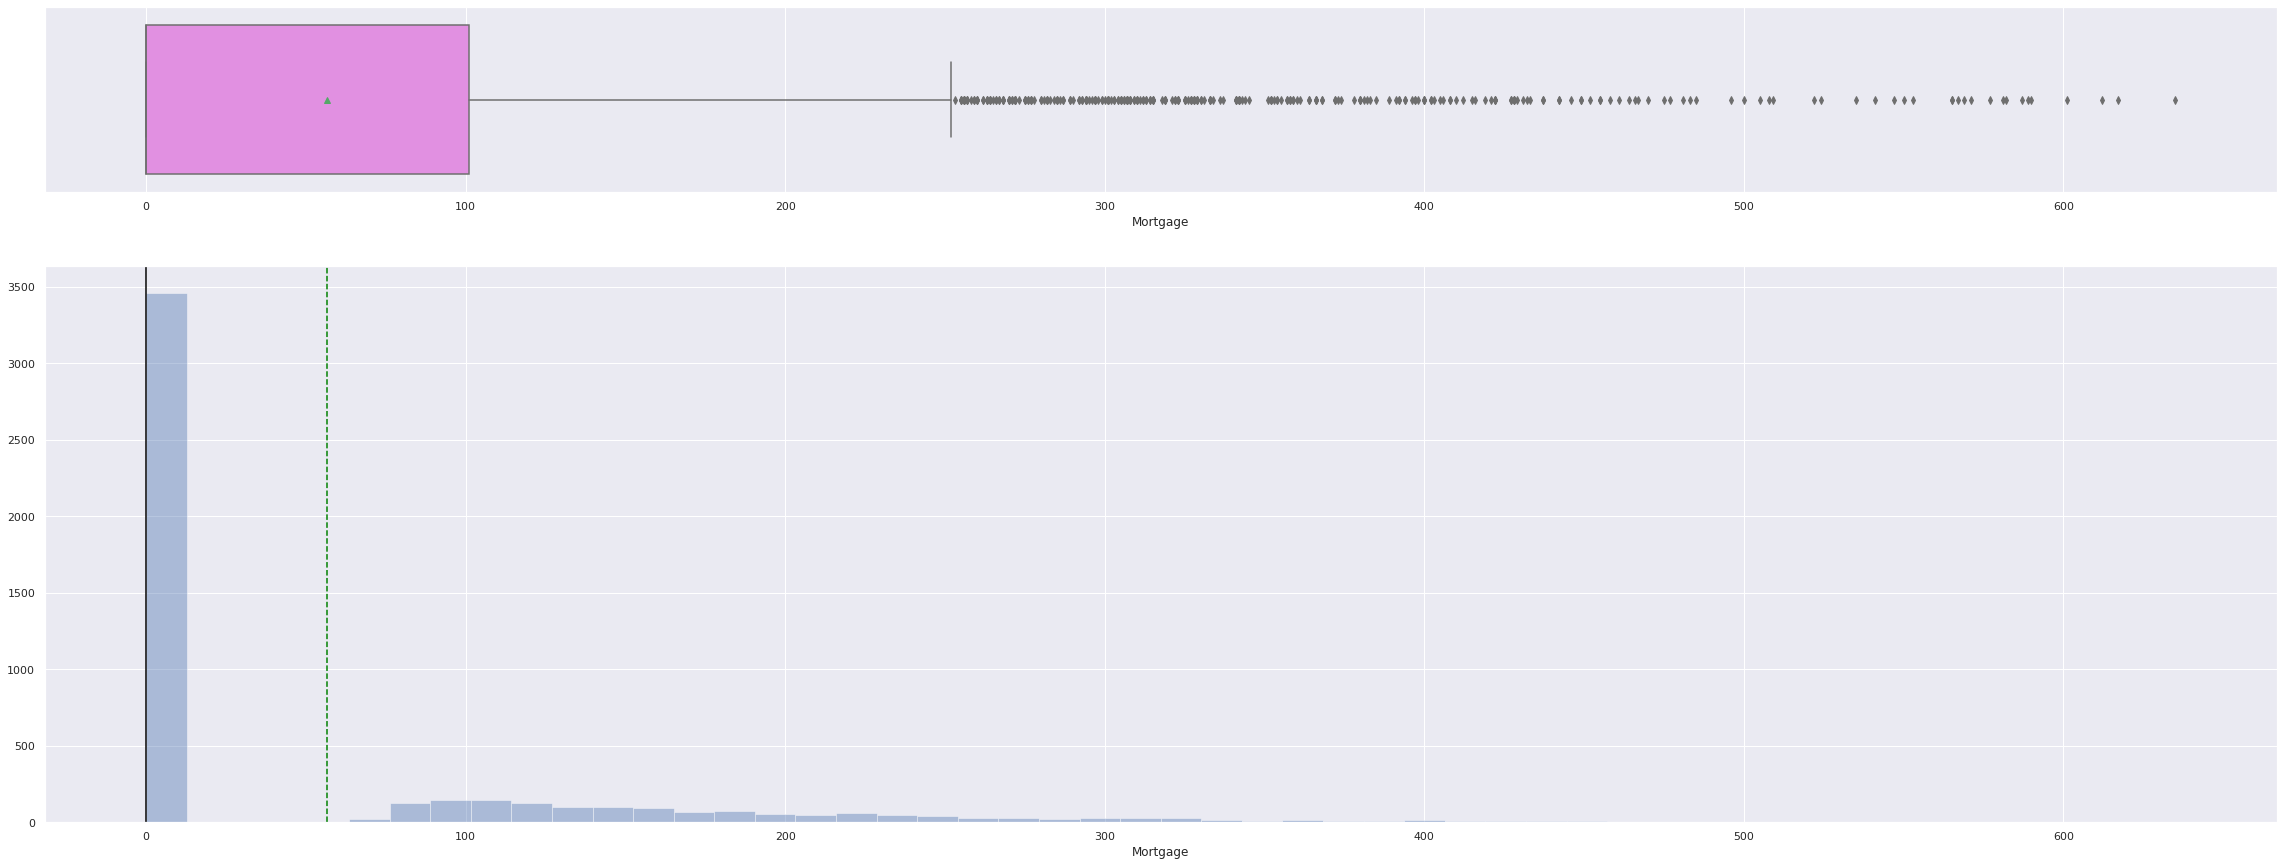

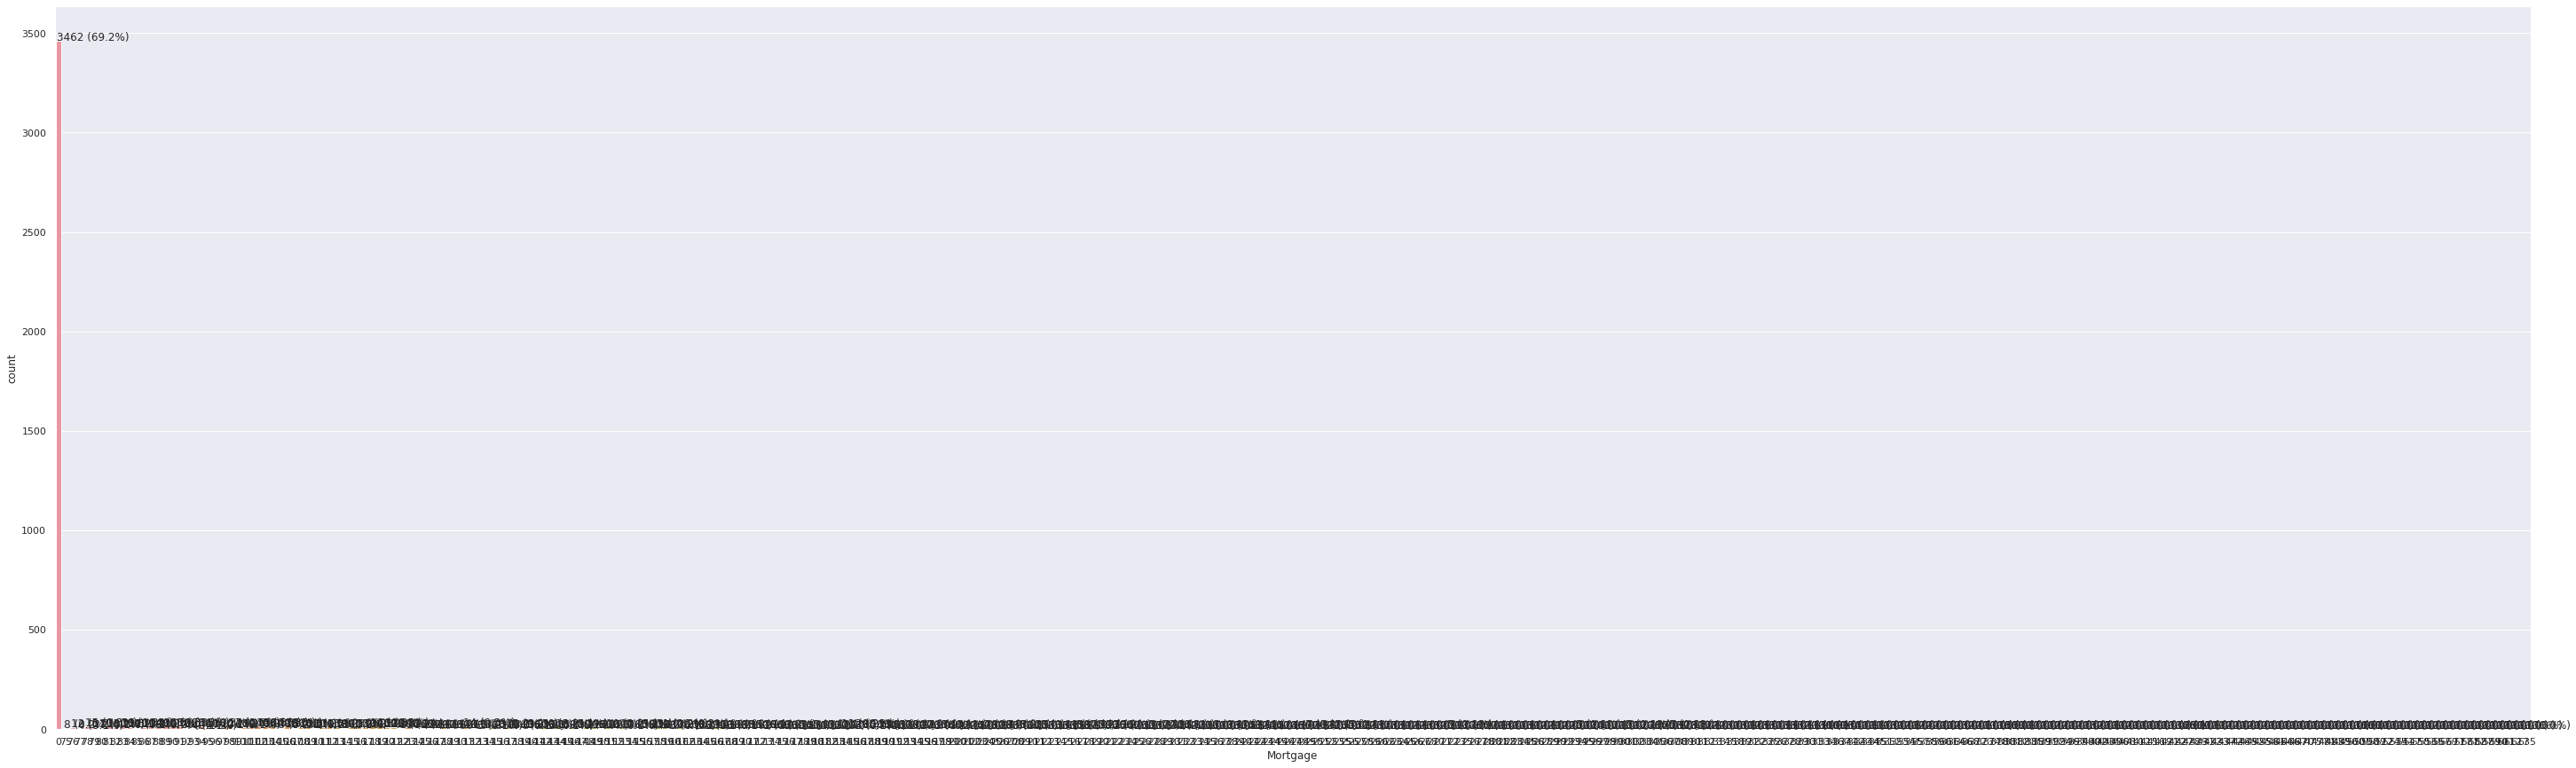

In [183]:
plotFeatures(["boxplot","histogram","countplot"], loanData["Mortgage"])

    1) As seen above, mortgage data is highly right skewed. 
    2) Most of the customers almost 70% (3462 out of 5000) don't have any mortgages.
    3) There are few customers with mortgage value between 100K to 300K.
    4) There are very very few customers with mortgage value more than 400K.
    

**Observing `Personal_Loan'**

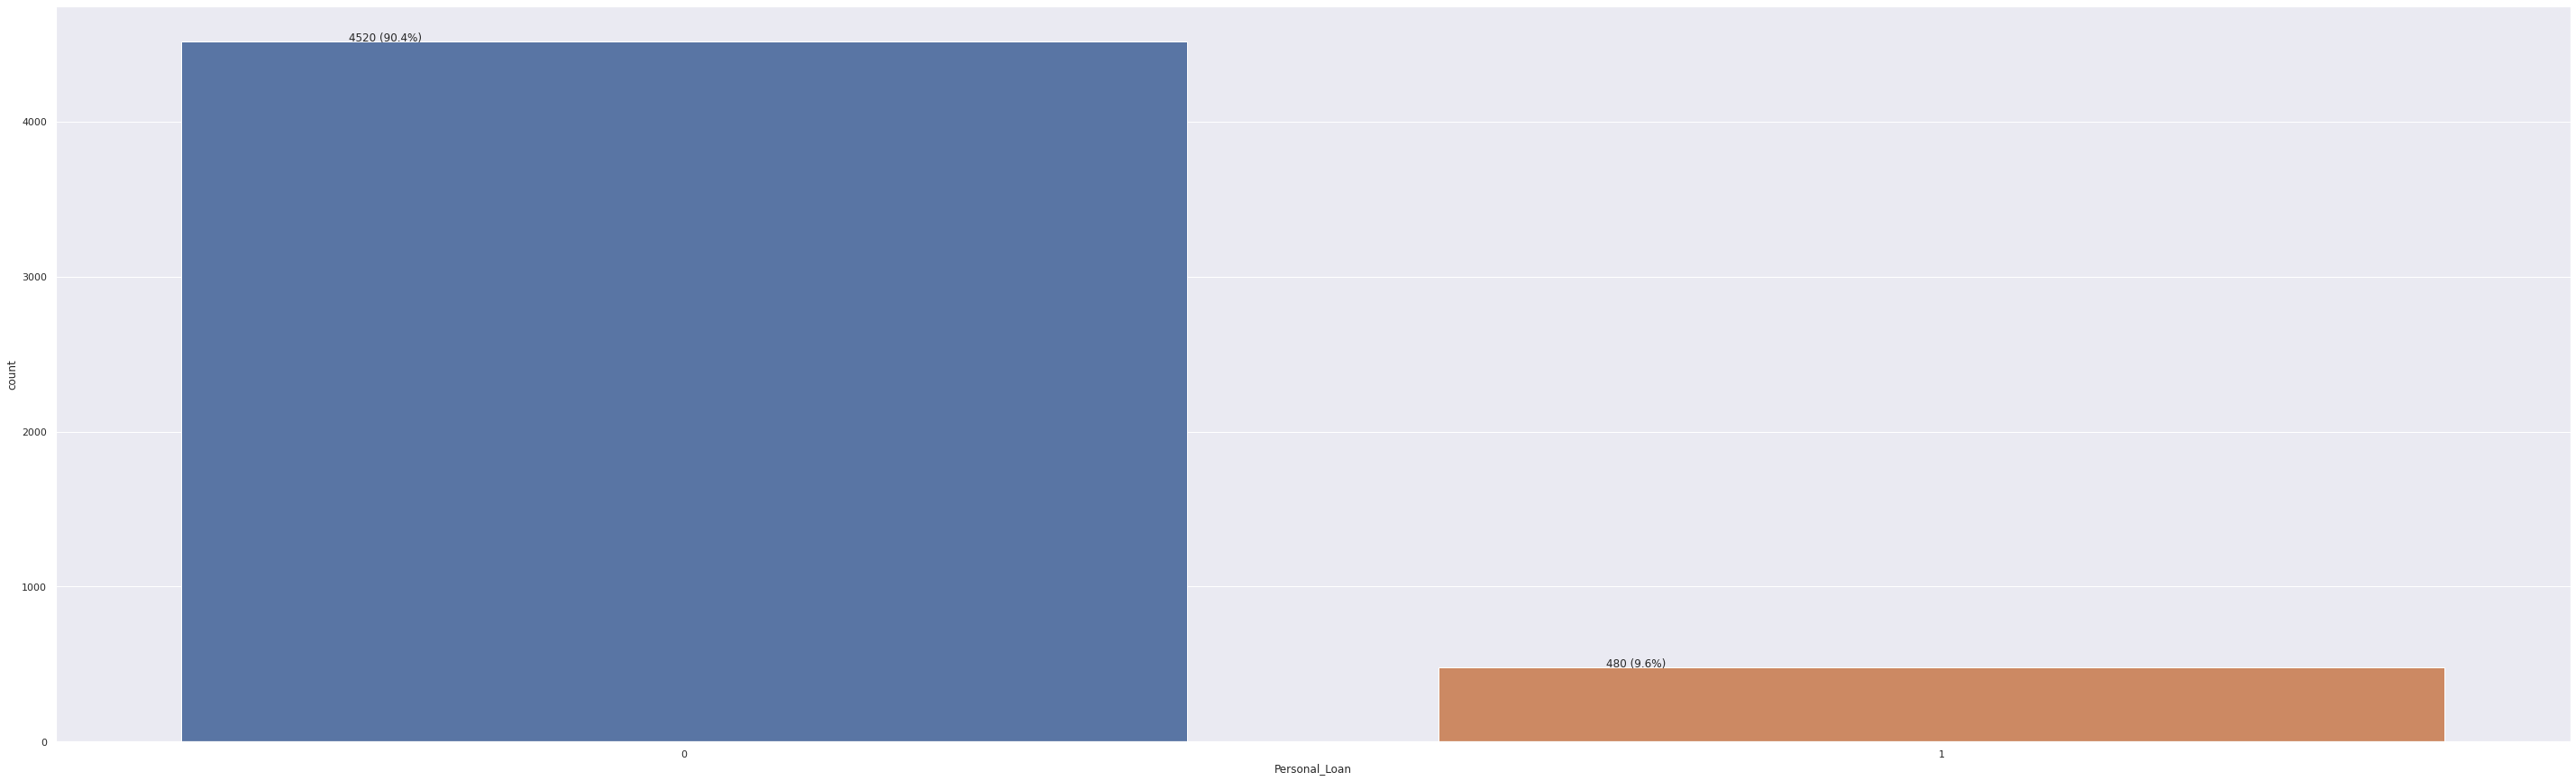

In [184]:
draw_countplot_with_count_percentage(loanData["Personal_Loan"])

    1) As per the stats above, most of the customers (90%) didn't accept the Personal_Loan offered in the last campaign. 
    2) It will be interesting to analyze the 480 customers who did accept the personal loan offered in the last campaign. We might find some trends important to increase the sell of personal loan to customers. 
    

**Observing `Securities_Account`**

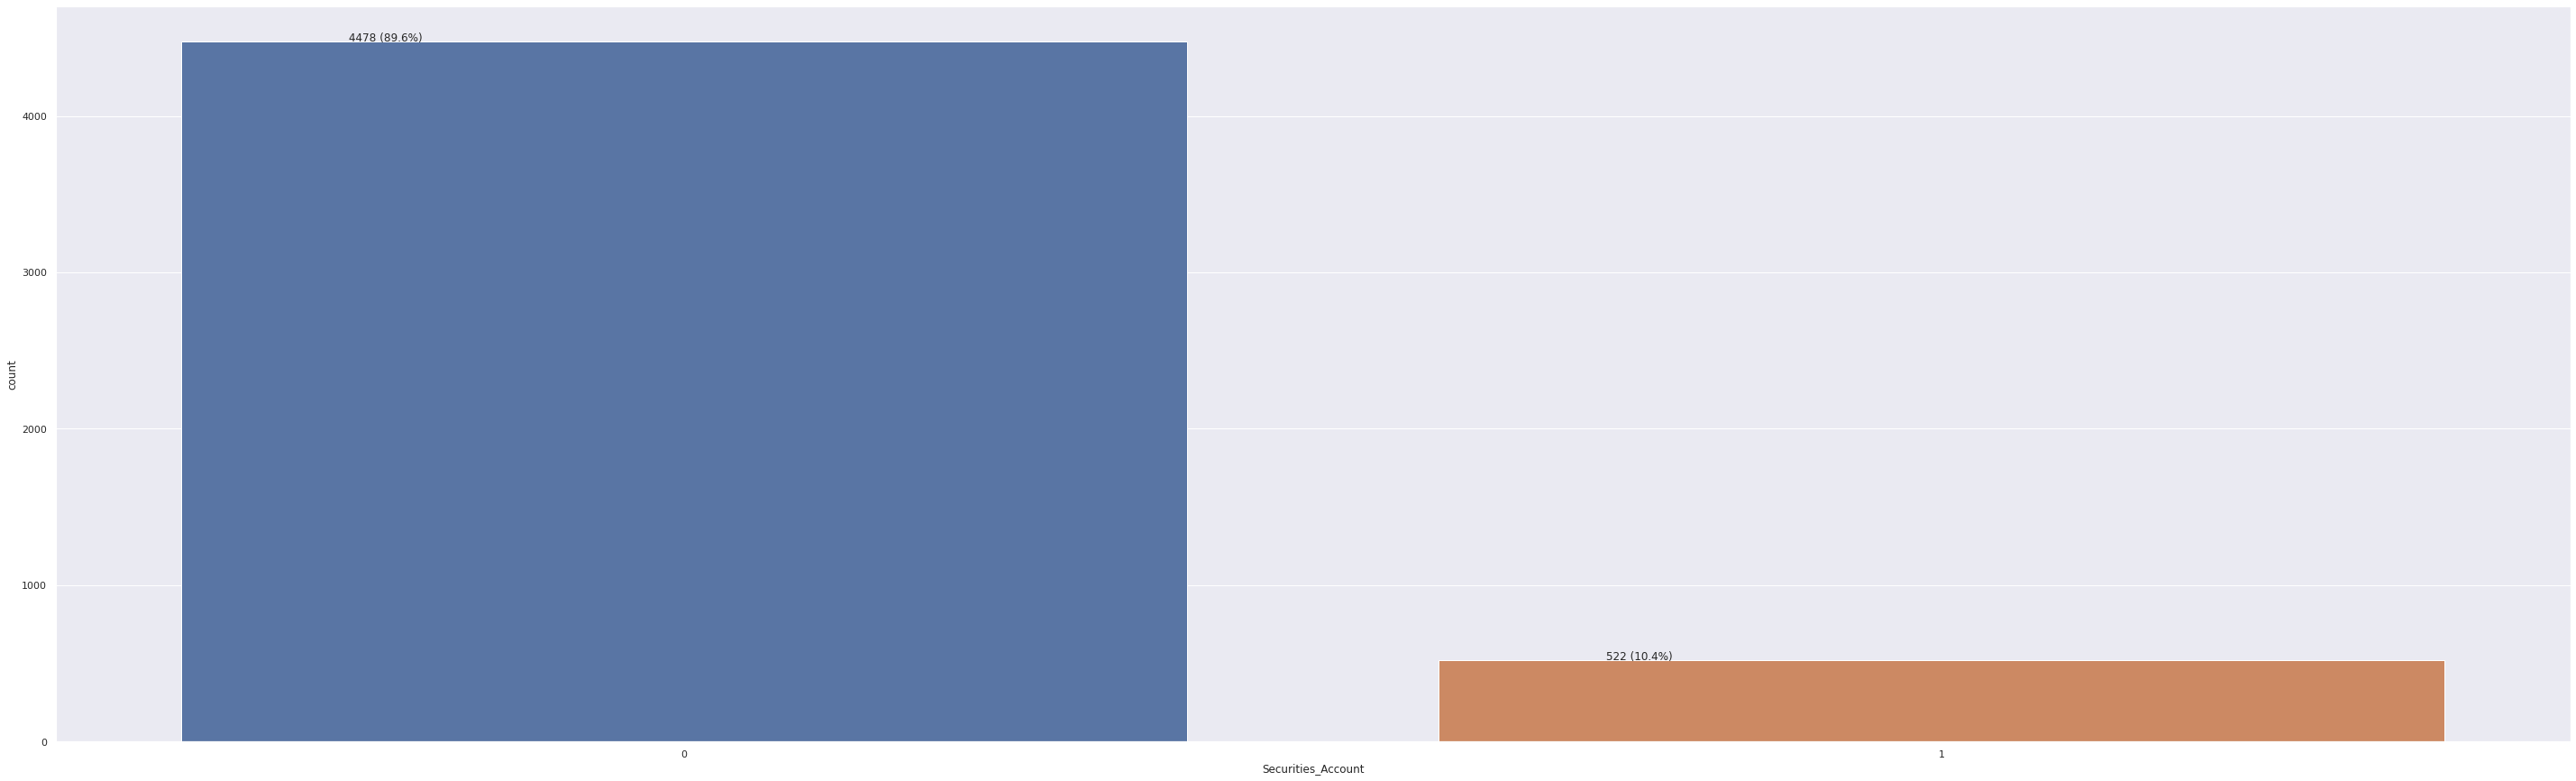

In [185]:
draw_countplot_with_count_percentage(loanData["Securities_Account"])

    1) Most of the customers (almost 90%) don't have security account with the bank. 
    2) There could be correlation between customers who don't have security account and customer that didn't accept Personal Loan offer. We will get more clarity in bivariate analysis later. 

**Observing `CD_Account`**

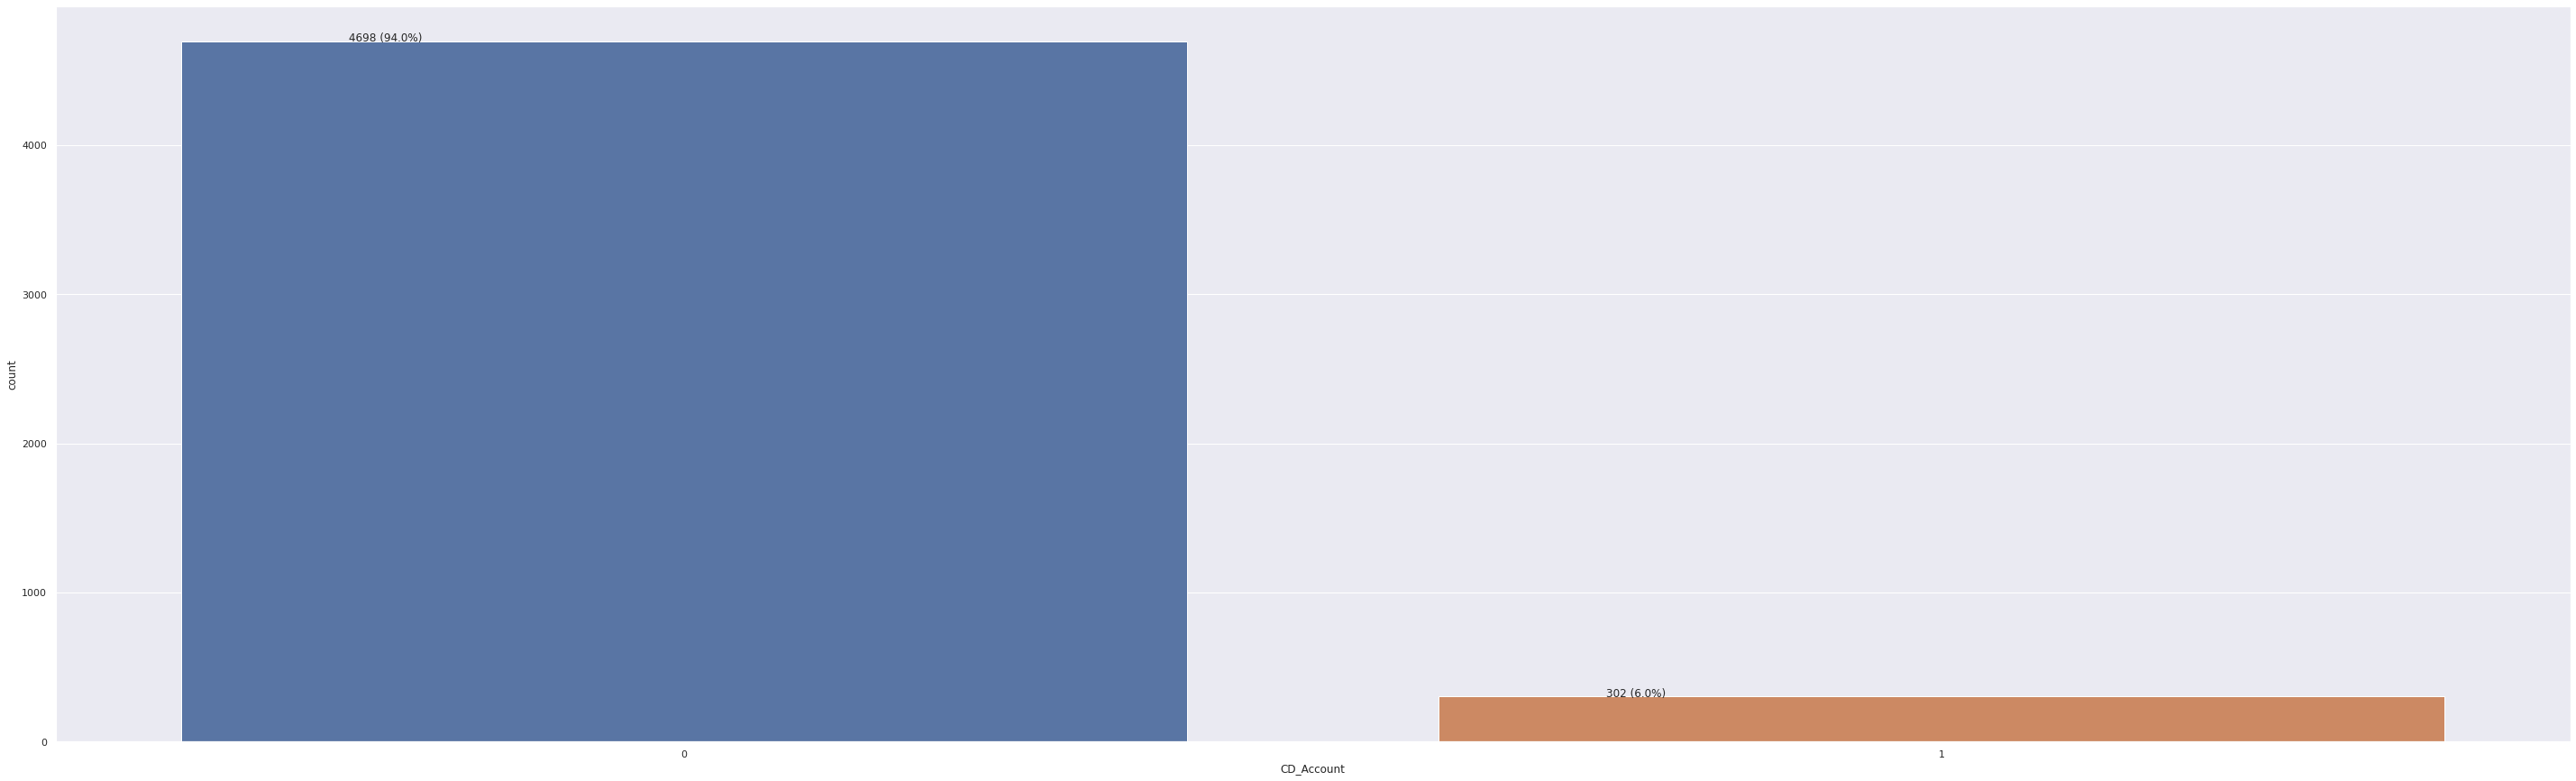

In [186]:
draw_countplot_with_count_percentage(loanData["CD_Account"])

    1) Again very high number of customers (94%) didn;t have Certificate of Deposit account with the bank. 
    2) These high numbers could be correlated with Personal Loan. We will get more clarity in bivariate analysis done later. 

**Observing `Online`**

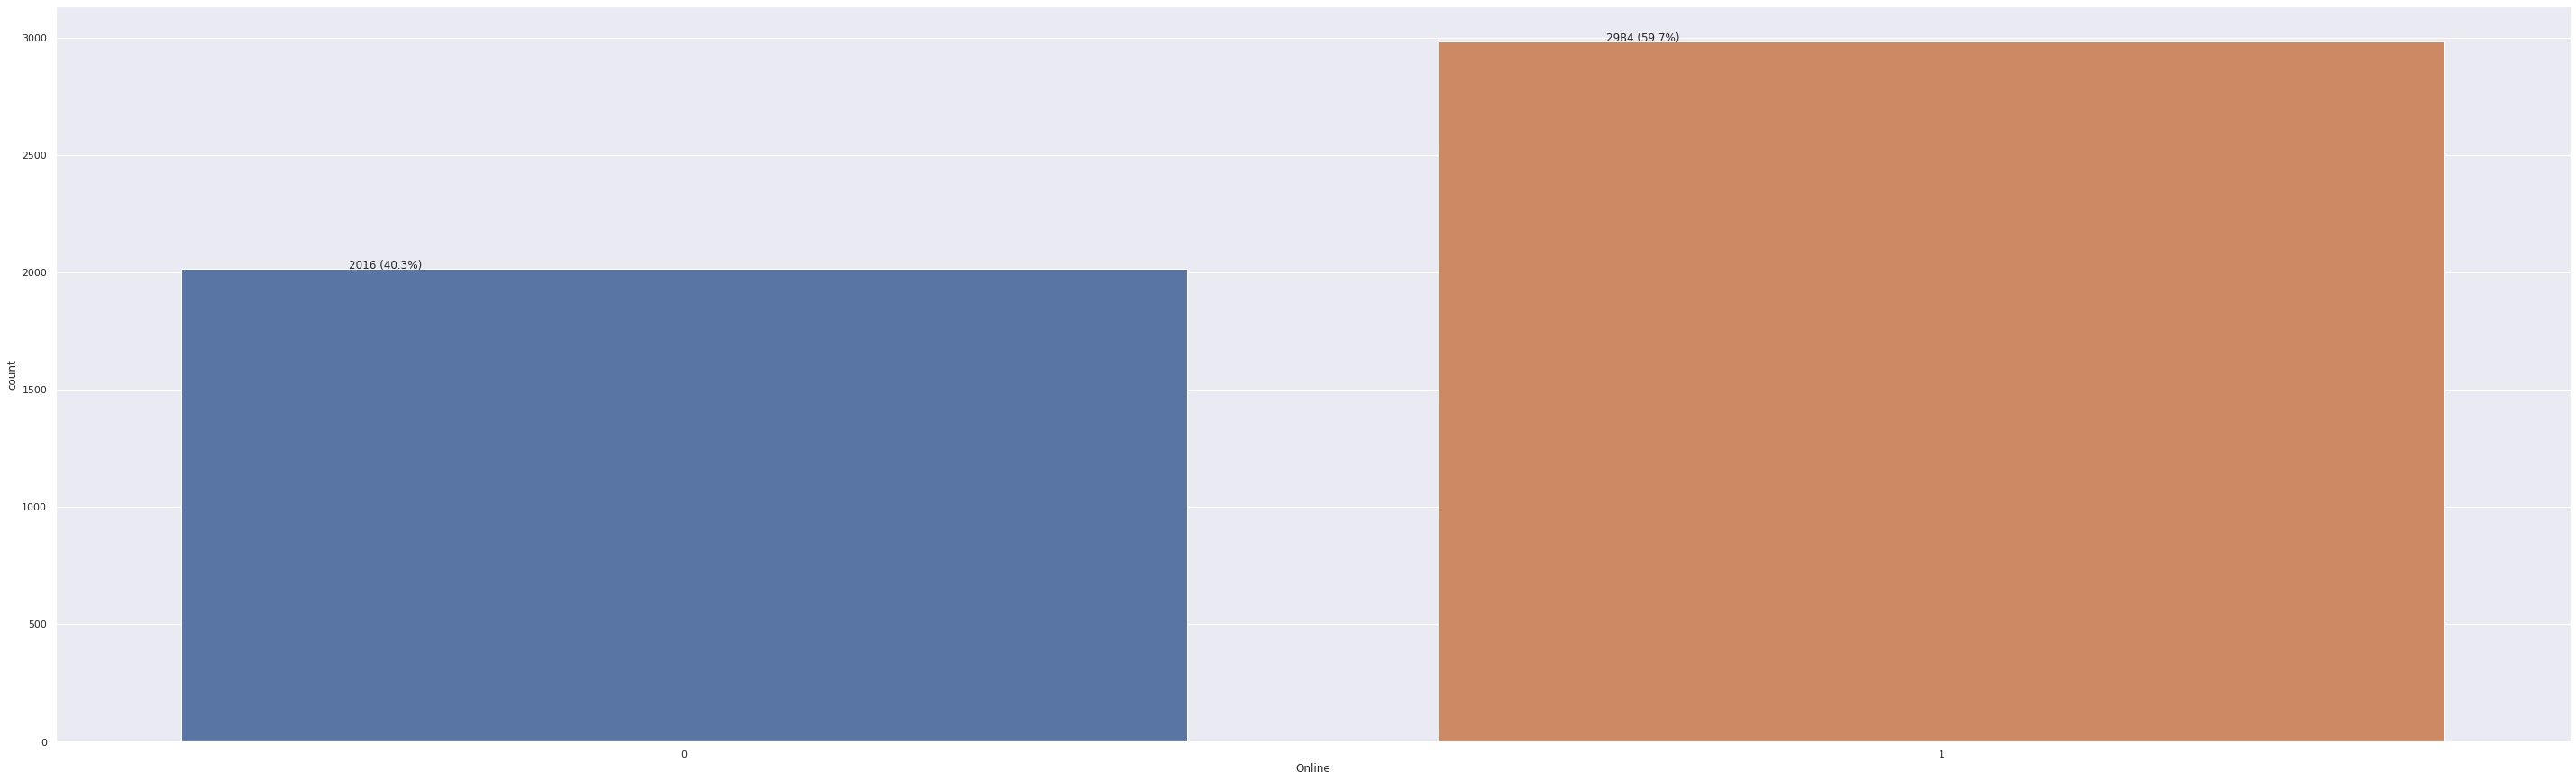

In [187]:
draw_countplot_with_count_percentage(loanData["Online"])

    1) Almost 60% of the customer's have online account with the bank.

**Observing `Credit Card`**

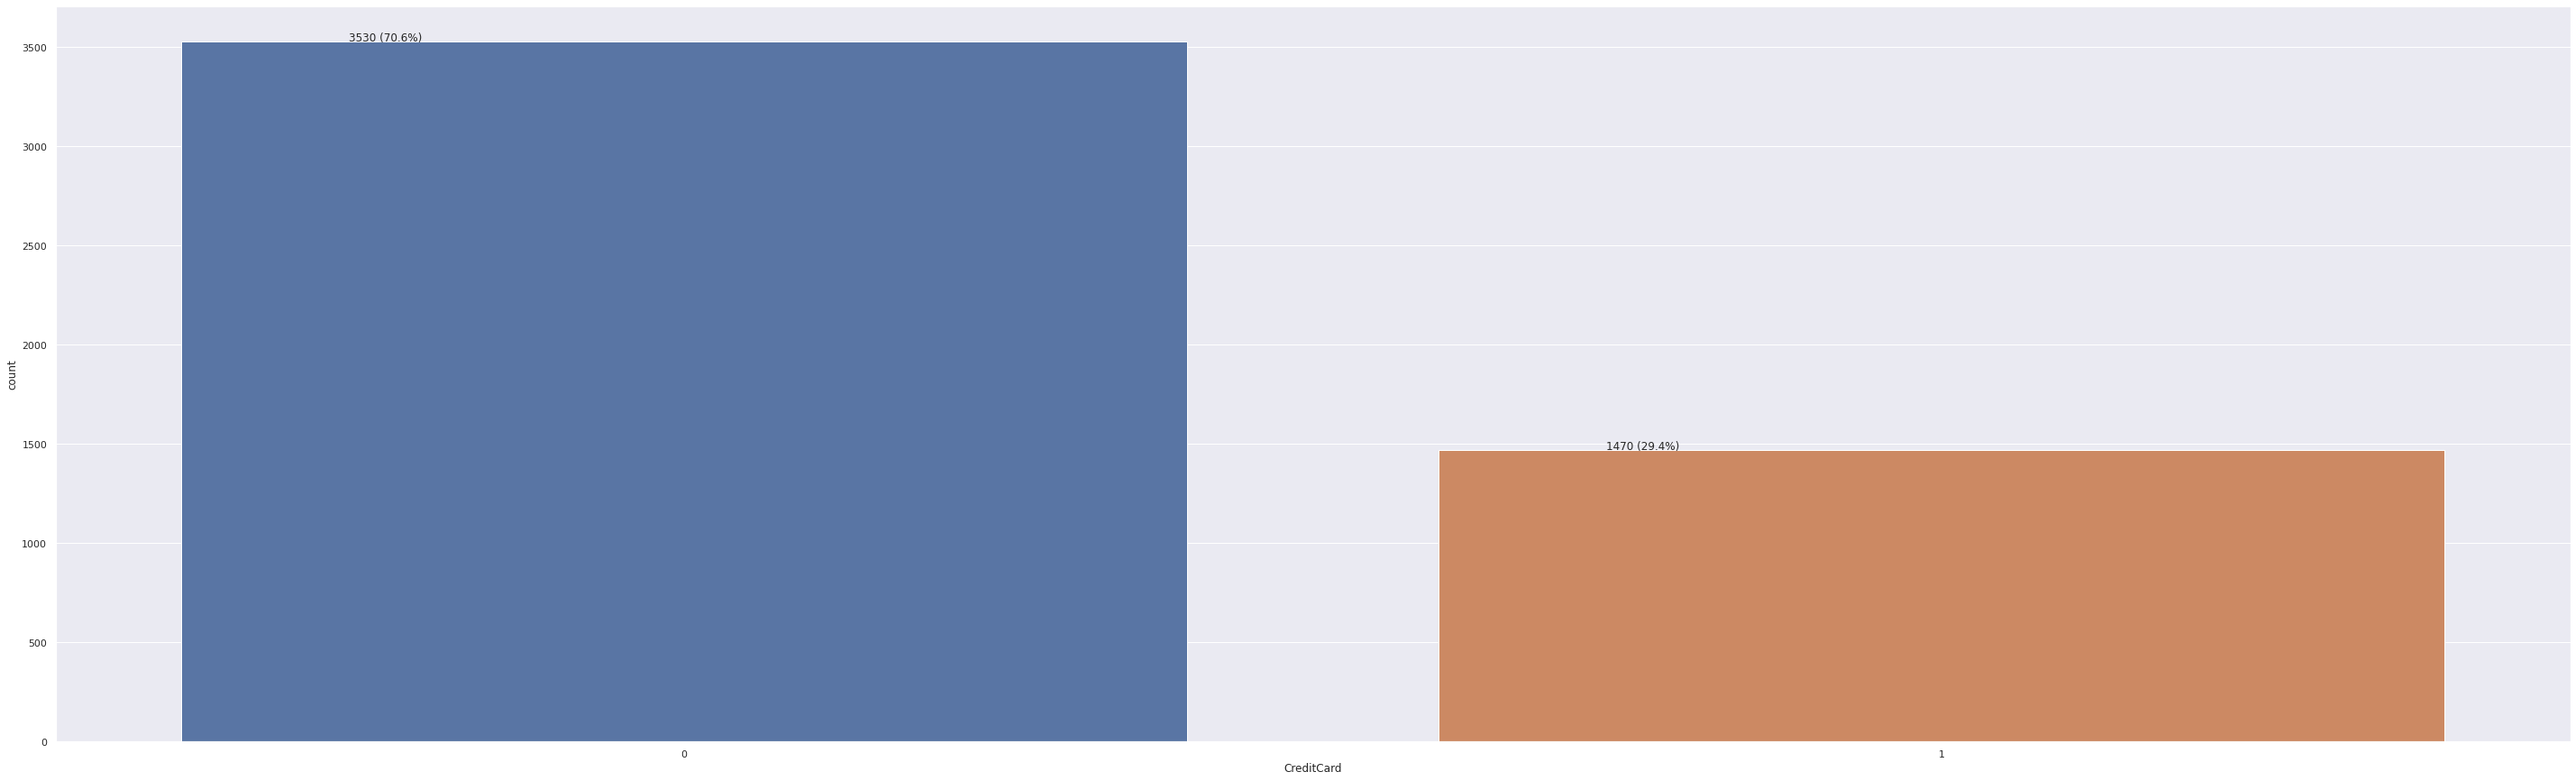

In [188]:
draw_countplot_with_count_percentage(loanData["CreditCard"])

    1) 70% of the customer's don't have Credit Card with another bank.

**Observing `ZIPCode`**

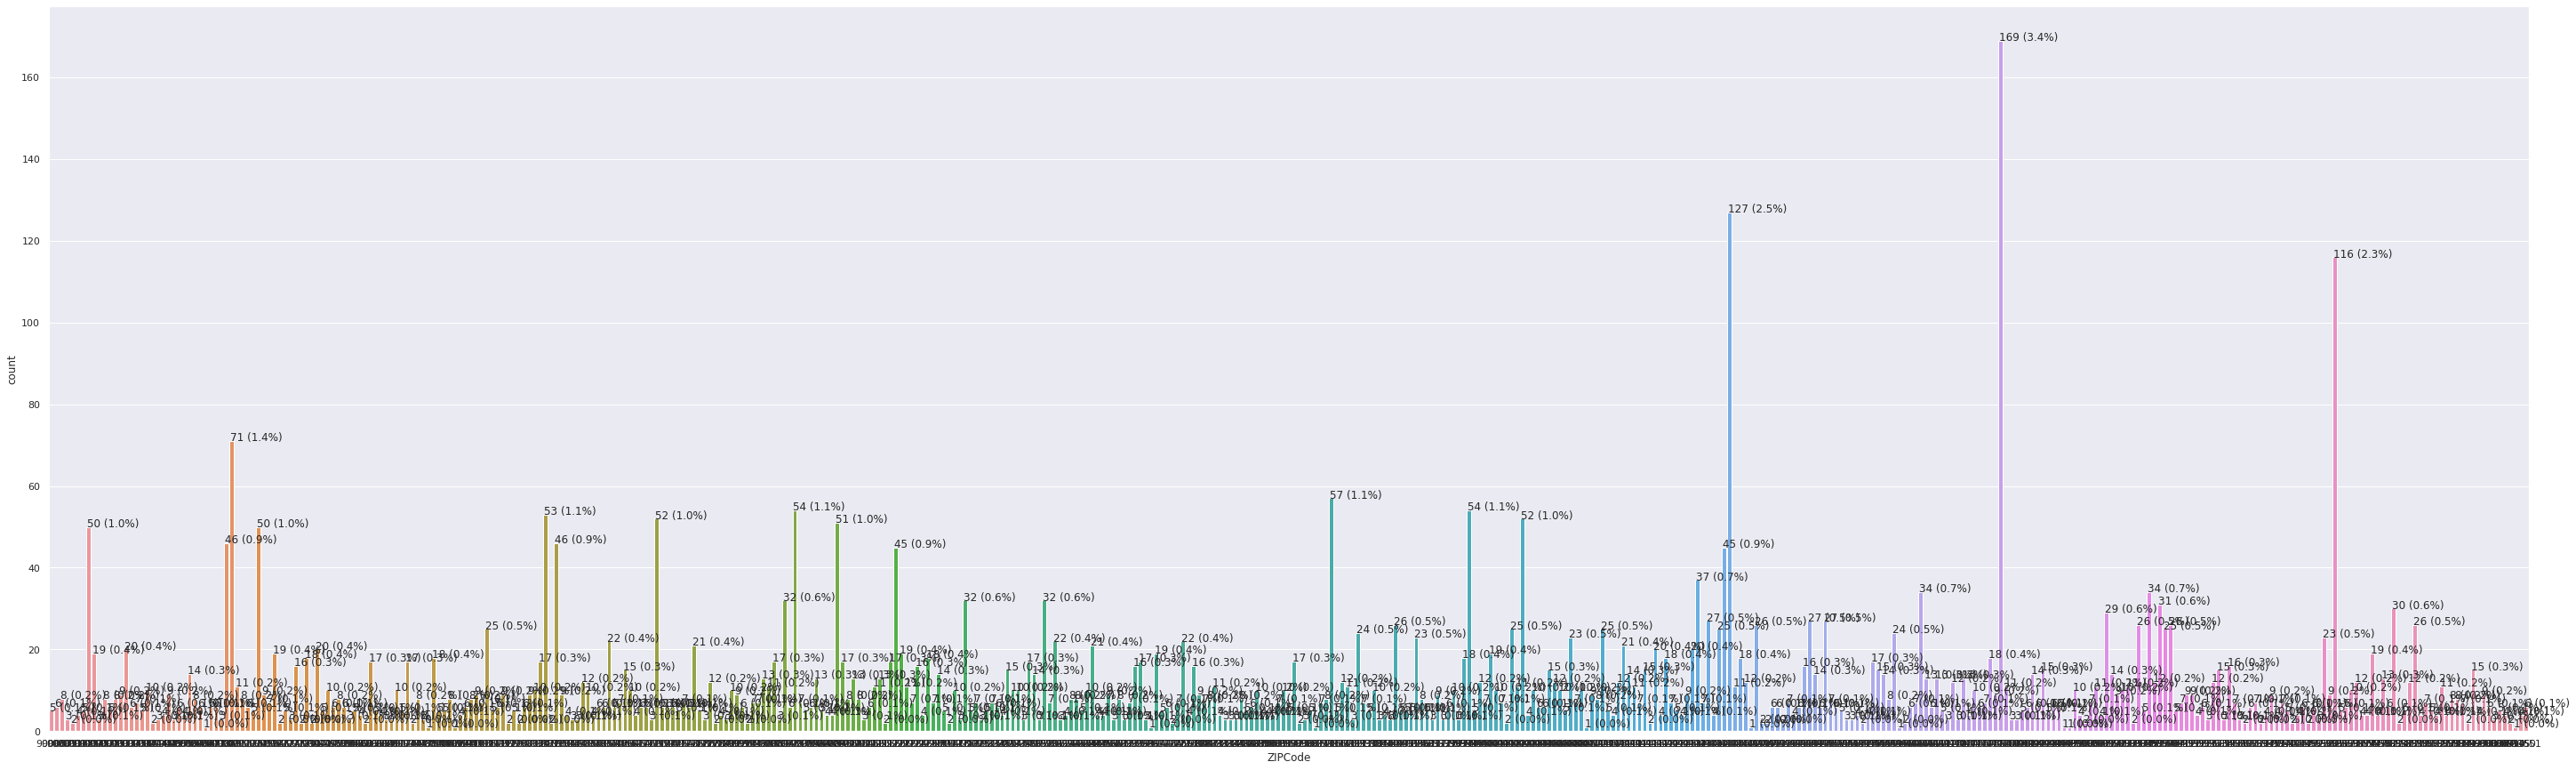

In [158]:
draw_countplot_with_count_percentage(loanData["ZIPCode"])

In [164]:
print(f'There are {loanData.ZIPCode.unique().size} unique zipcodes')  

There are 467 unique zipcodes


In [194]:
loanData.ZIPCode.value_counts().rename_axis('ZIPCodes').reset_index(name='counts').head(10)

ZIPCodes  counts
0     94720     169
1     94305     127
2     95616     116
3     90095      71
4     93106      57
5     92037      54
6     93943      54
7     91320      53
8     91711      52
9     94025      52

In [195]:
loanData.ZIPCode.value_counts().rename_axis('ZIPCodes').reset_index(name='counts').tail(10)

ZIPCodes  counts
457     94598       1
458     91024       1
459     94970       1
460     94965       1
461     90813       1
462     94087       1
463     96145       1
464     90068       1
465     92694       1
466     94404       1

    1) As seen above customers spread across many zipcodes and not just concentrated in few ZipCodes. 
    2) There are some ZIPCodes that have more customers and there are few zipcode where customer density pretty sparse. 

### BiVariate Analysis

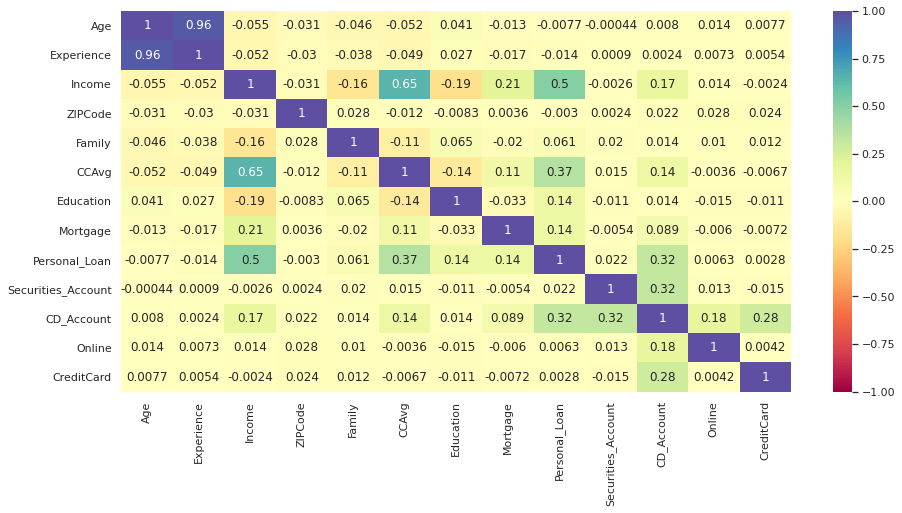

In [240]:
plt.figure(figsize=(15, 7))
sns.heatmap(loanData.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

    1) Income and Credit Card Balance(CCAvg) has a high correlation. 
    2) Experience and Age has very strong positive correlation (.96). This indicates with Age, overall Experince of the customers increases linearly.
    3) There is some correlation between Personal Loan with Income, CCAvg, CD Account.

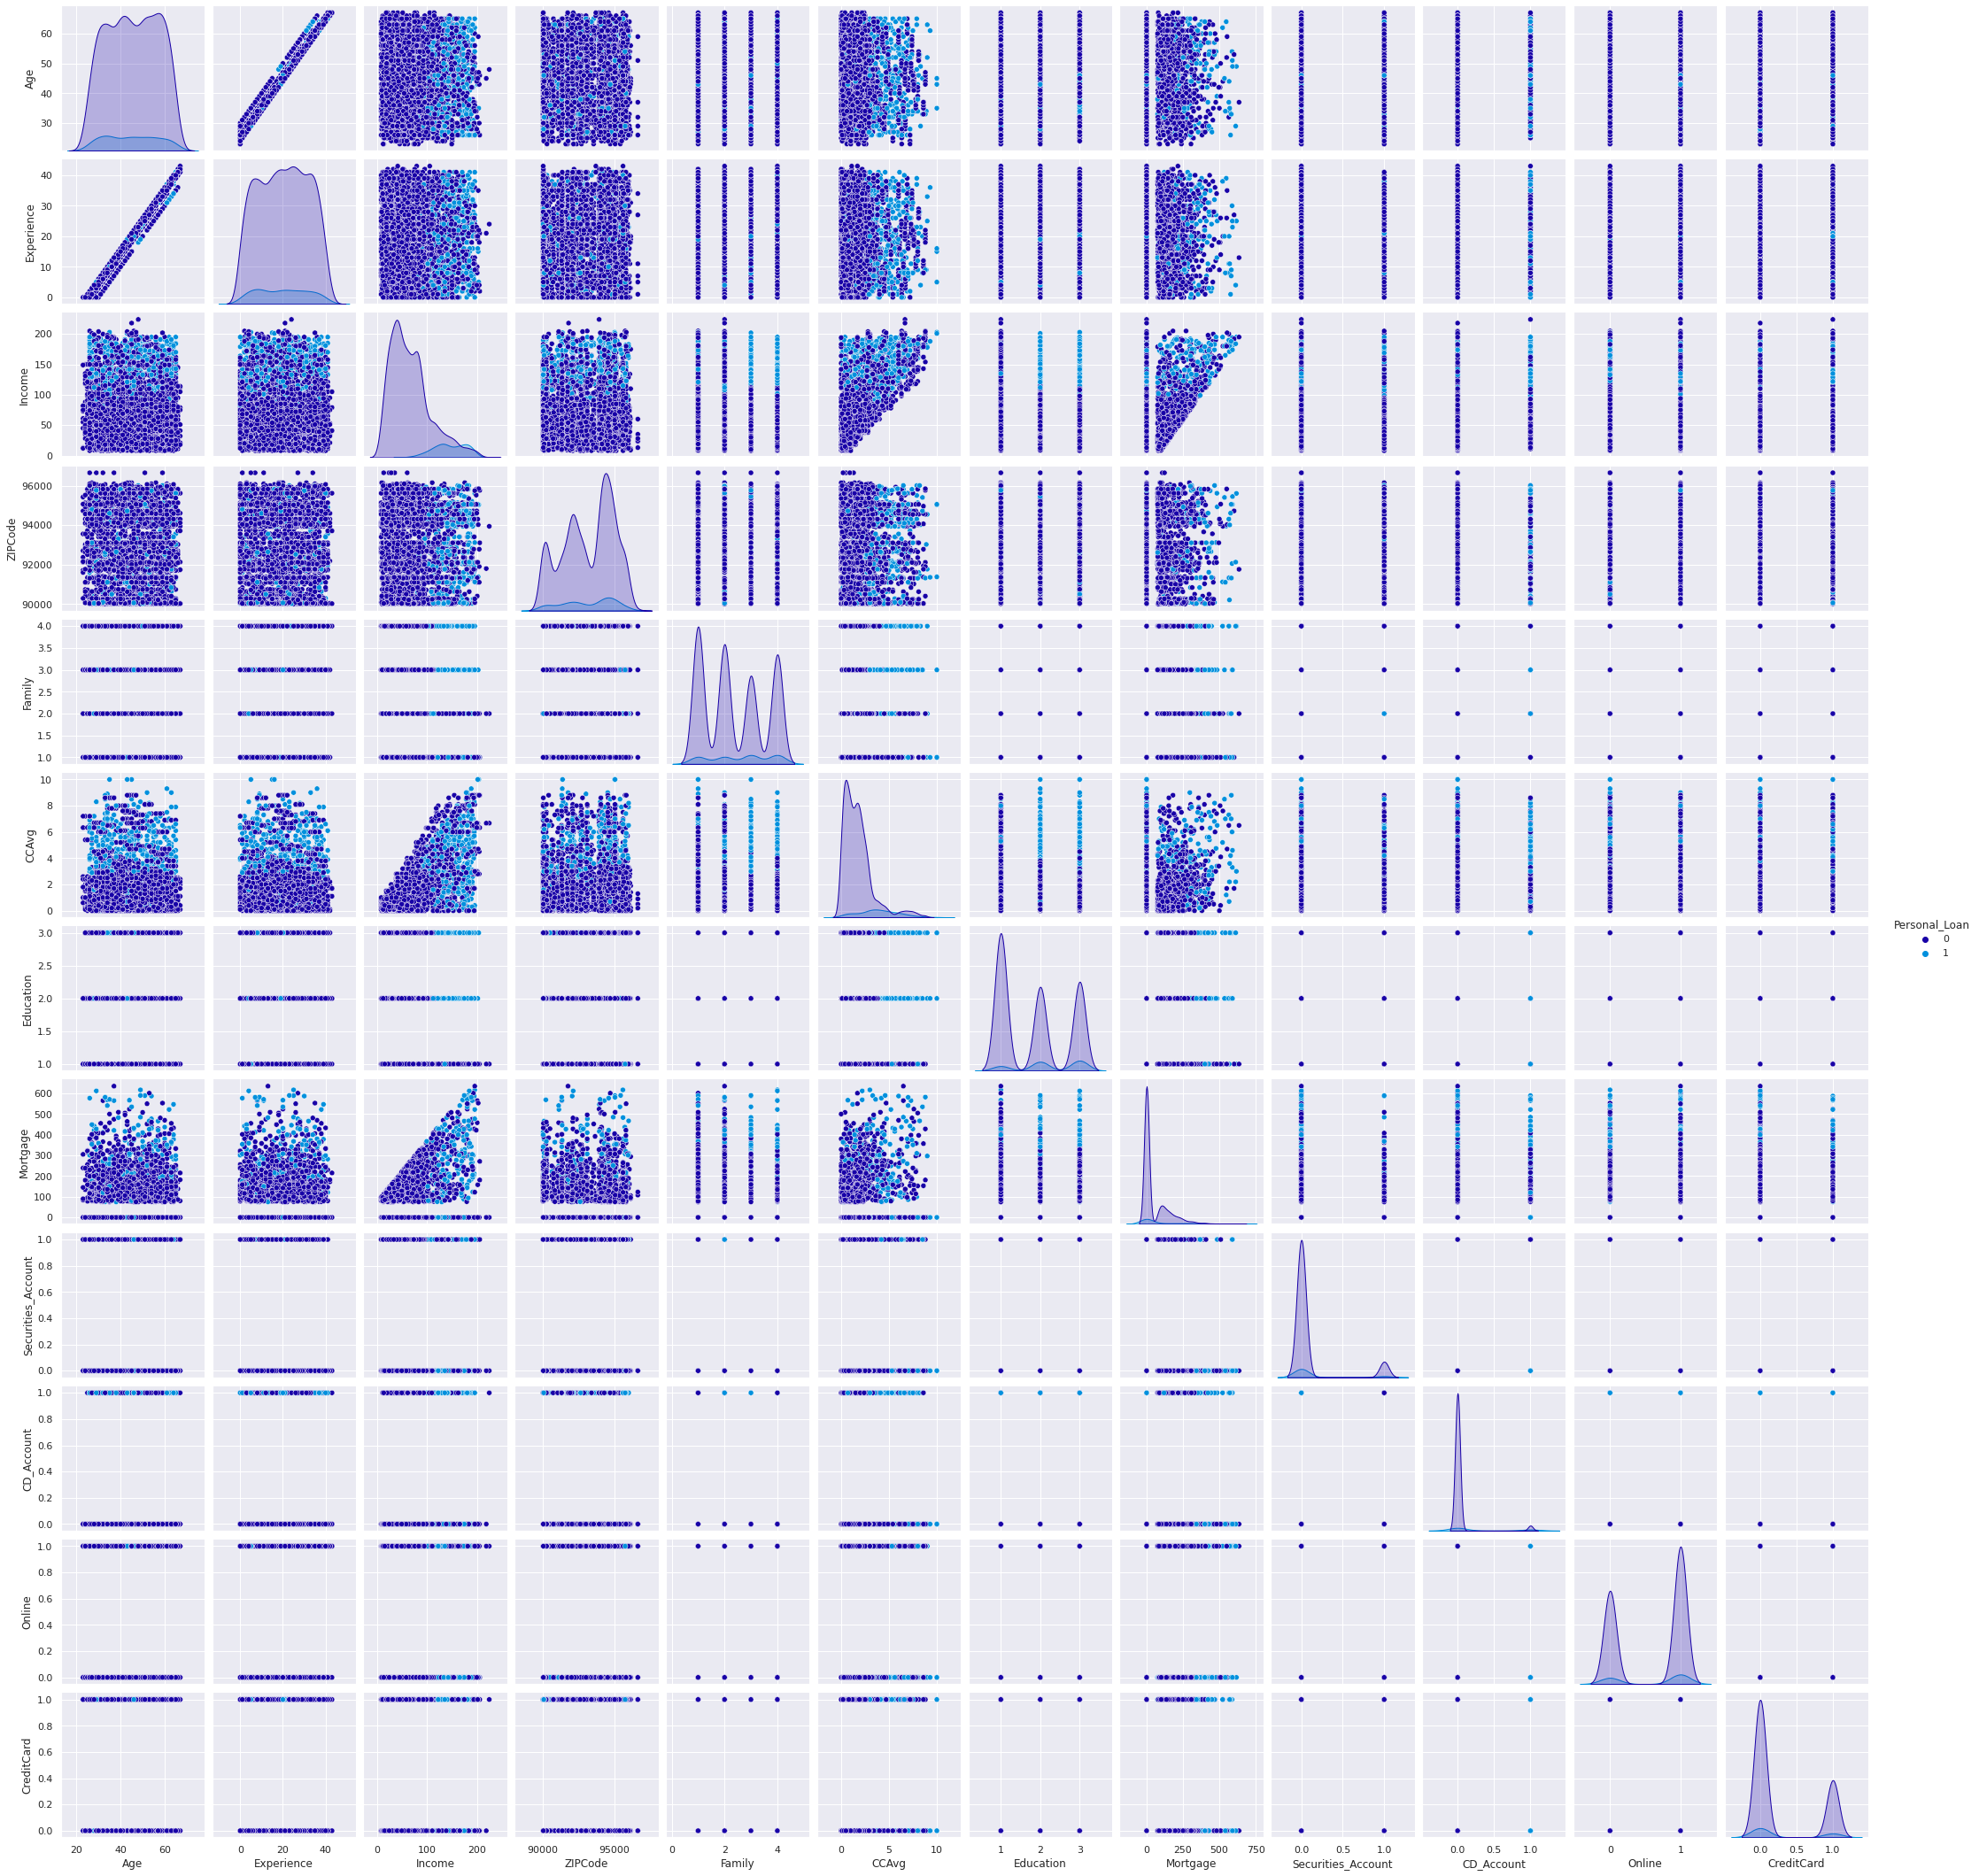

In [324]:
sns.pairplot(data=loanData, hue="Personal_Loan")
plt.show()

### `Personal Loan vs Income` 

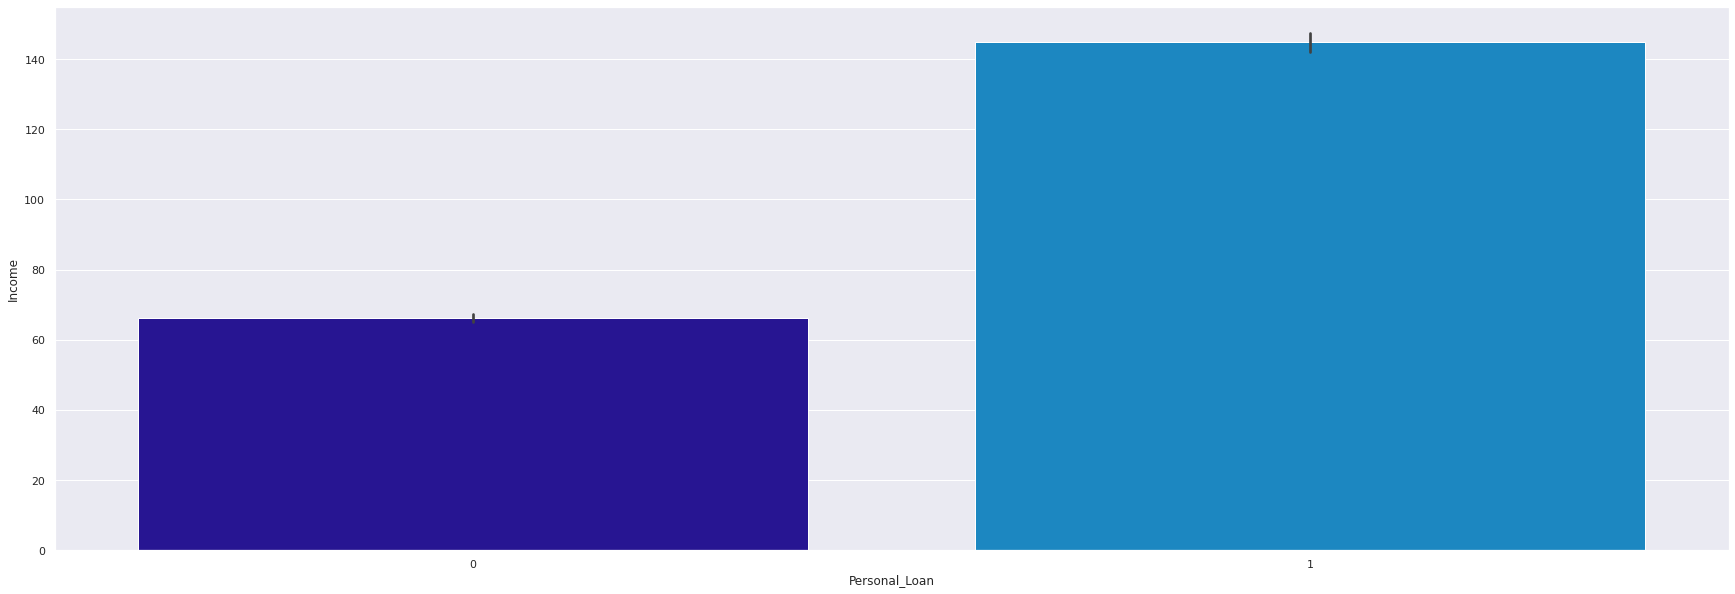

In [315]:
plt.figure(figsize=(30,10))
sns.barplot(x="Personal_Loan", y="Income", data=loanData)
plt.show()

Customers with higher Income tend to have accepted Personal Loan Offer in the past. 

###  `Personal Loan vs CCAvg`

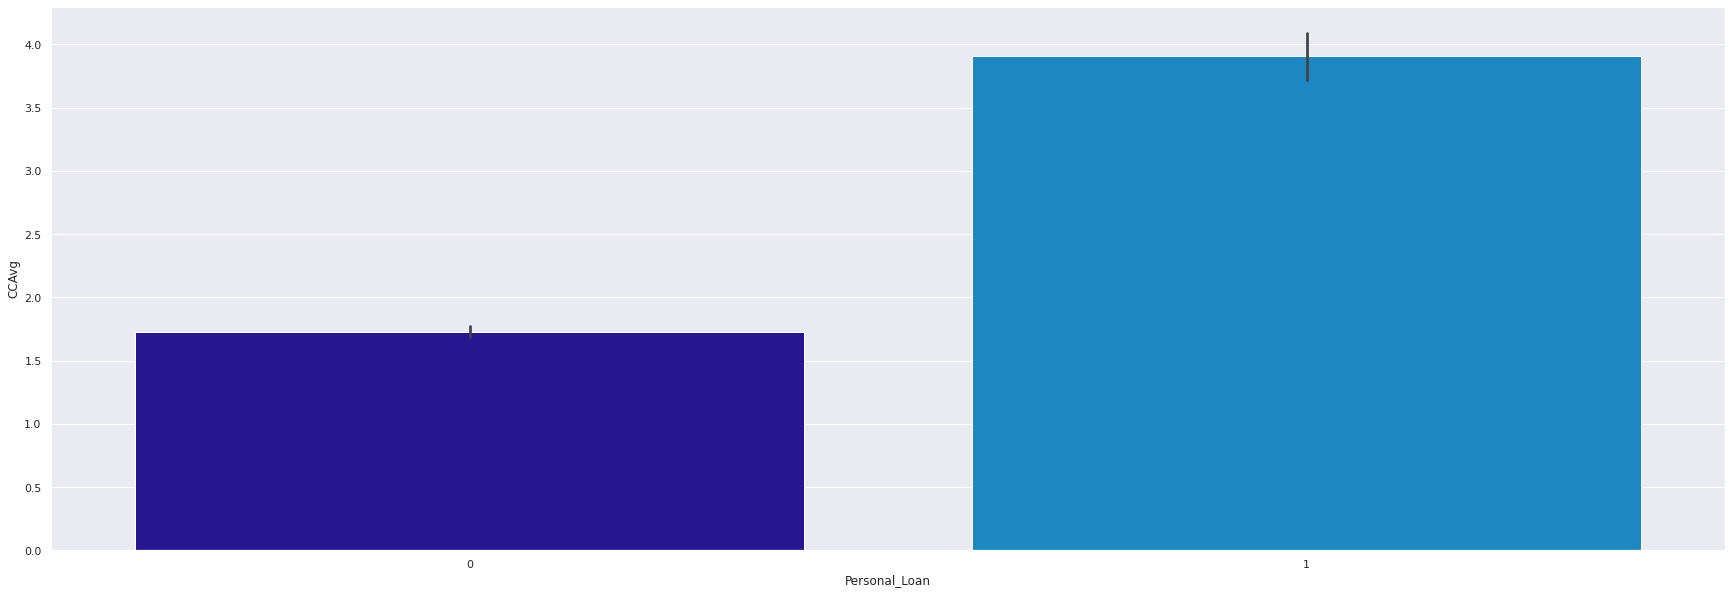

In [316]:
plt.figure(figsize=(30,10))
sns.barplot(x="Personal_Loan", y="CCAvg", data=loanData)
plt.show()

Customer with higher Credit Card Balance tend to have accepted Personal Loan offer in the past

### `Personal Loan vs Mortgage` 

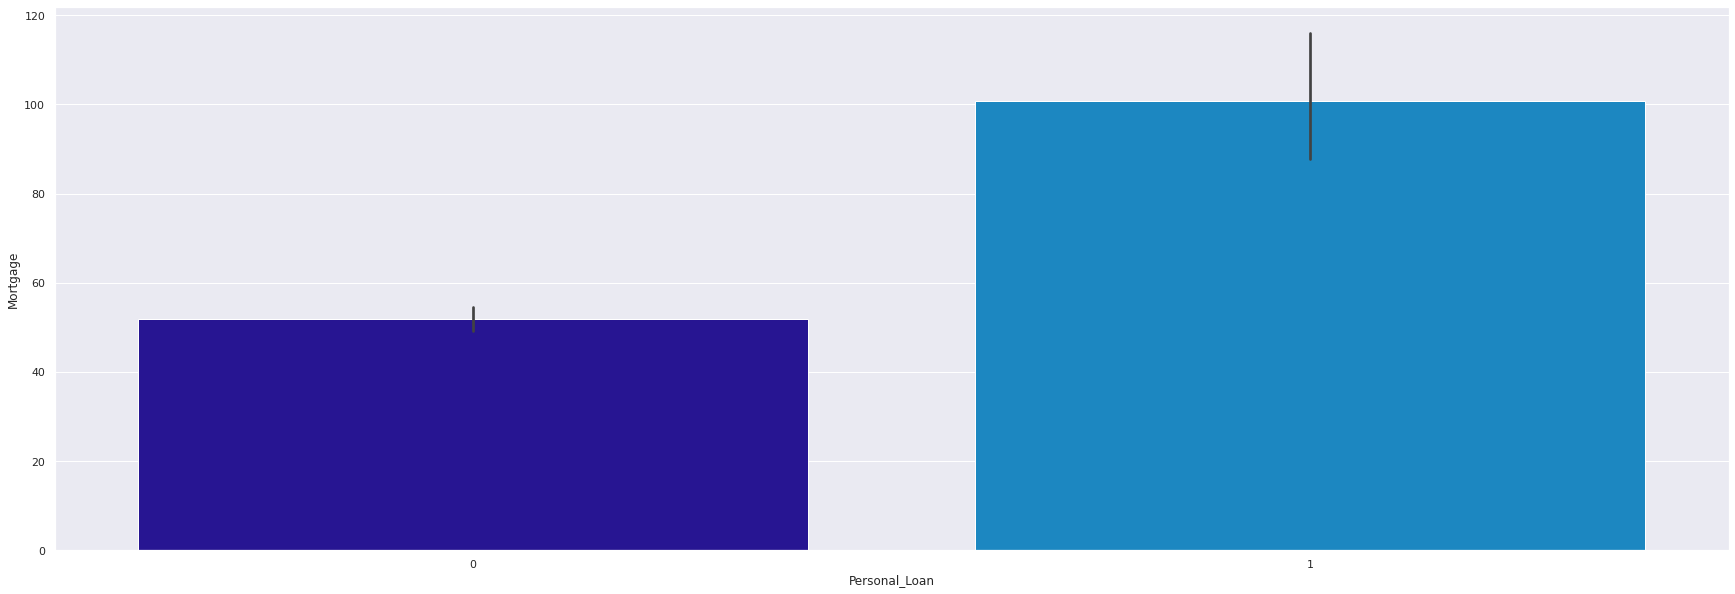

In [318]:
plt.figure(figsize=(30,10))
sns.barplot(x="Personal_Loan", y="Mortgage", data=loanData)
plt.show()

Customers with Higher Mortgage value tend to have accepted the Personal Loan in the past. 

### `Personal Loan vs Education` 

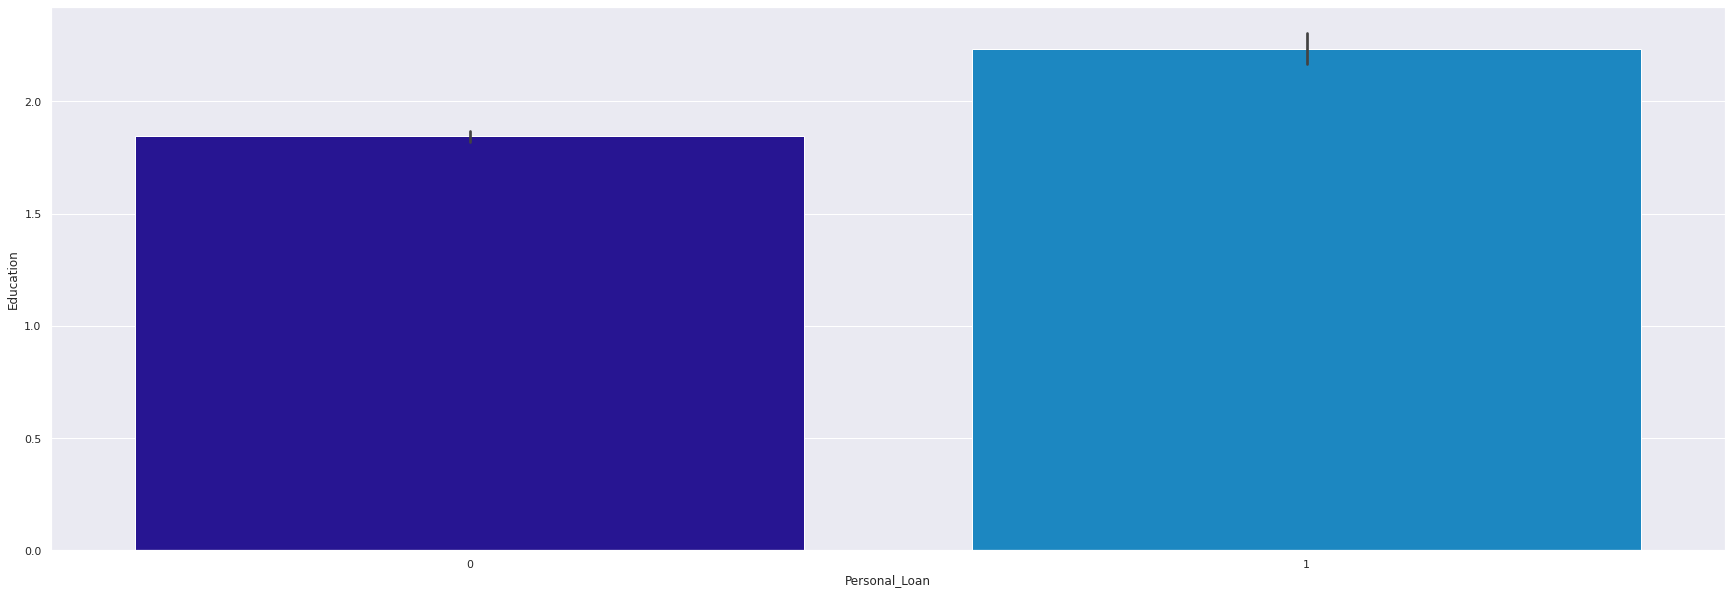

In [319]:
plt.figure(figsize=(30,10))
sns.barplot(x="Personal_Loan", y="Education", data=loanData)
plt.show()

Customers with higher level of education tend to have accepted the Personal Loan Offer in the past. 

### `Personal Loan vs CD Account` 

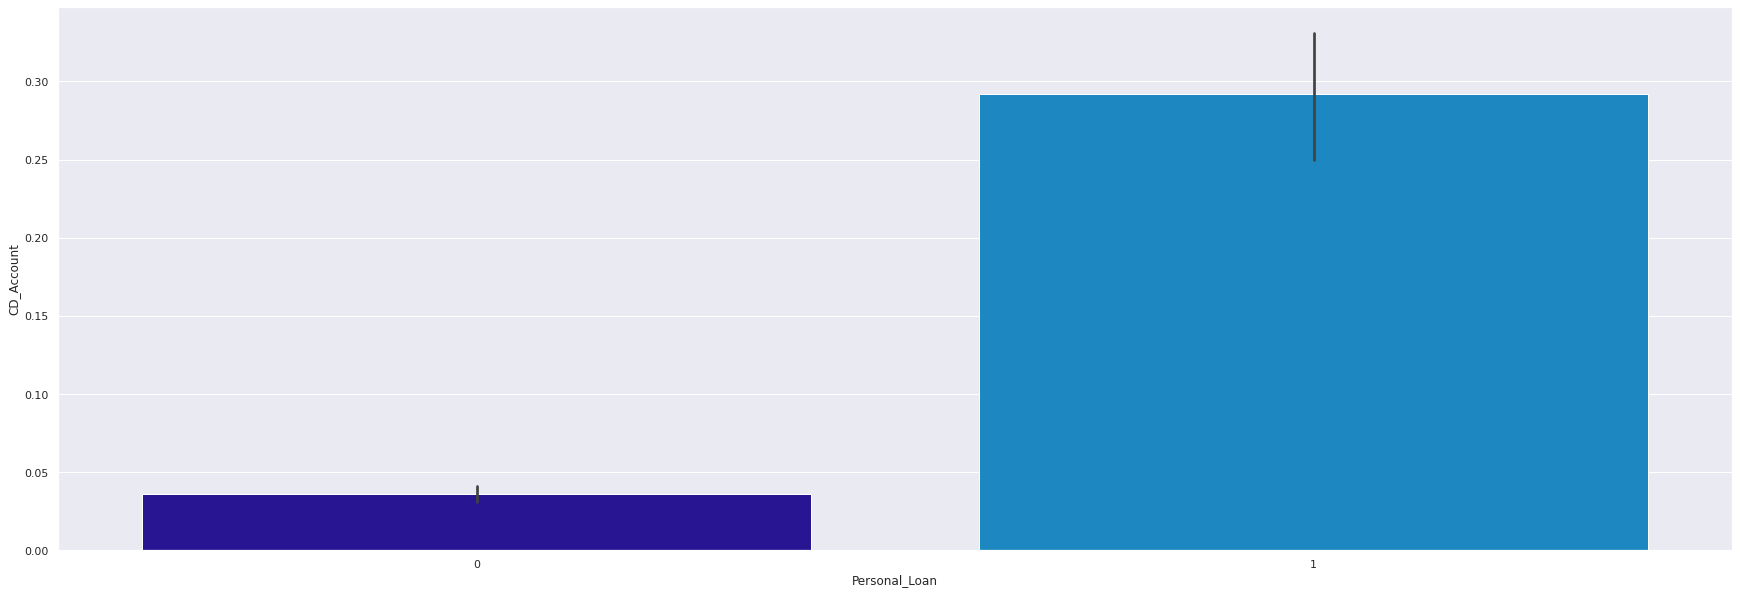

In [322]:
plt.figure(figsize=(30,10))
sns.barplot(x="Personal_Loan", y="CD_Account", data=loanData)
plt.show()

Customers who have CD Account tends to accept the Personal Loan Offer in the past. 

### `Personal Loan vs Age`  

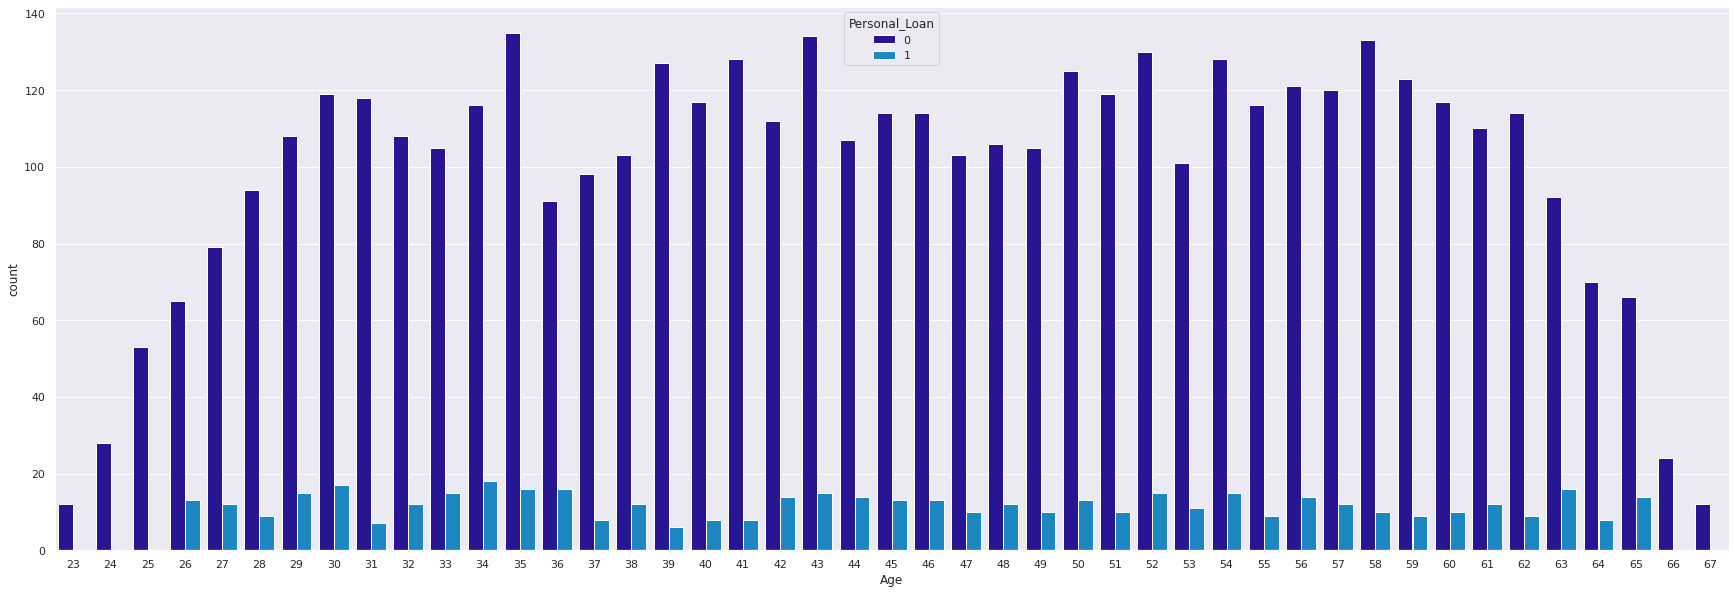

In [328]:
plt.figure(figsize=(30,10))
sns.countplot(x="Age", hue="Personal_Loan", data=loanData)
plt.show()

1) Personal loan acceptance rate in the past has been low across all different age groups. 

2) Yougest customers to have accept the Personal Loan offer is 26 while older customers are of 65 years.

### `Personal Loan vs Family` 

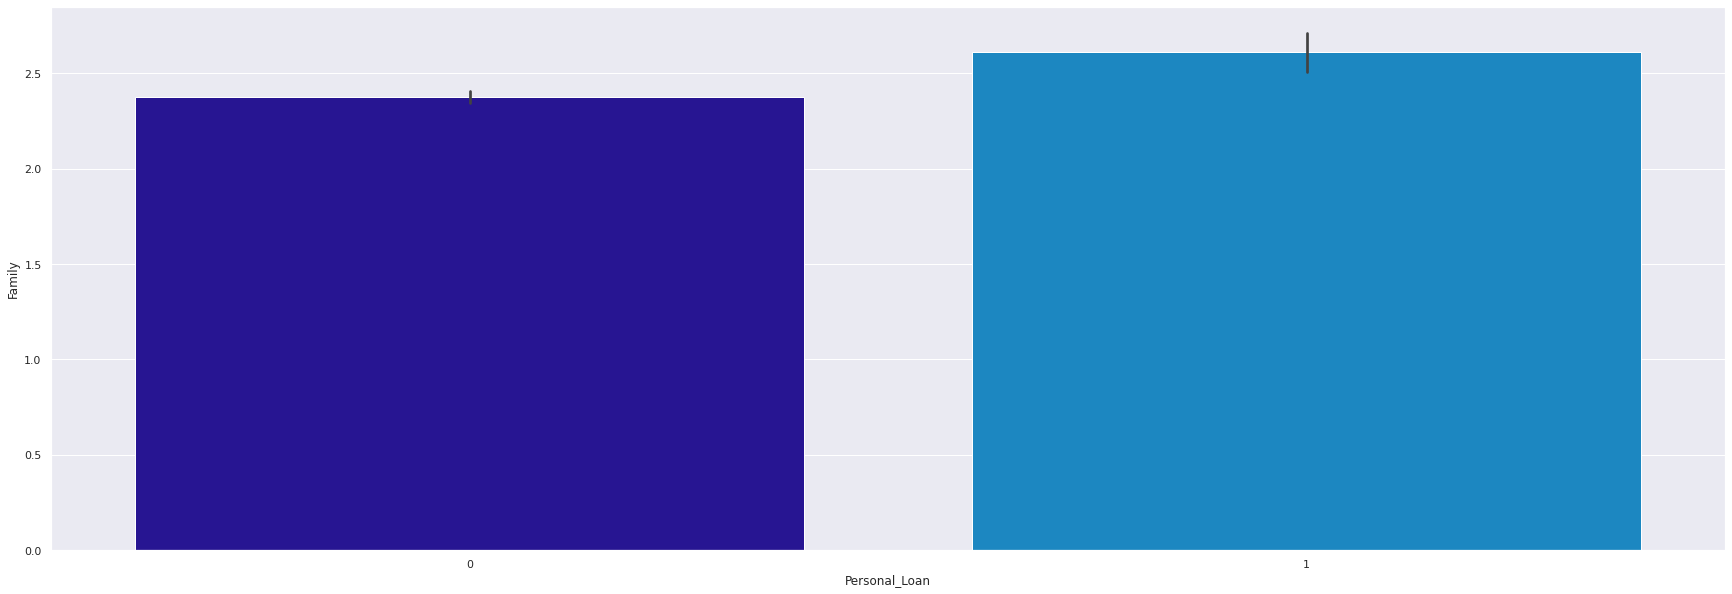

In [329]:
plt.figure(figsize=(30,10))
sns.barplot(y="Family", x="Personal_Loan", data=loanData)
plt.show()

Family size of customer who have accepted the Personal Loan Offer in the past is slightly higher than those who haven't. 

### `Personal Loan vs Online` 

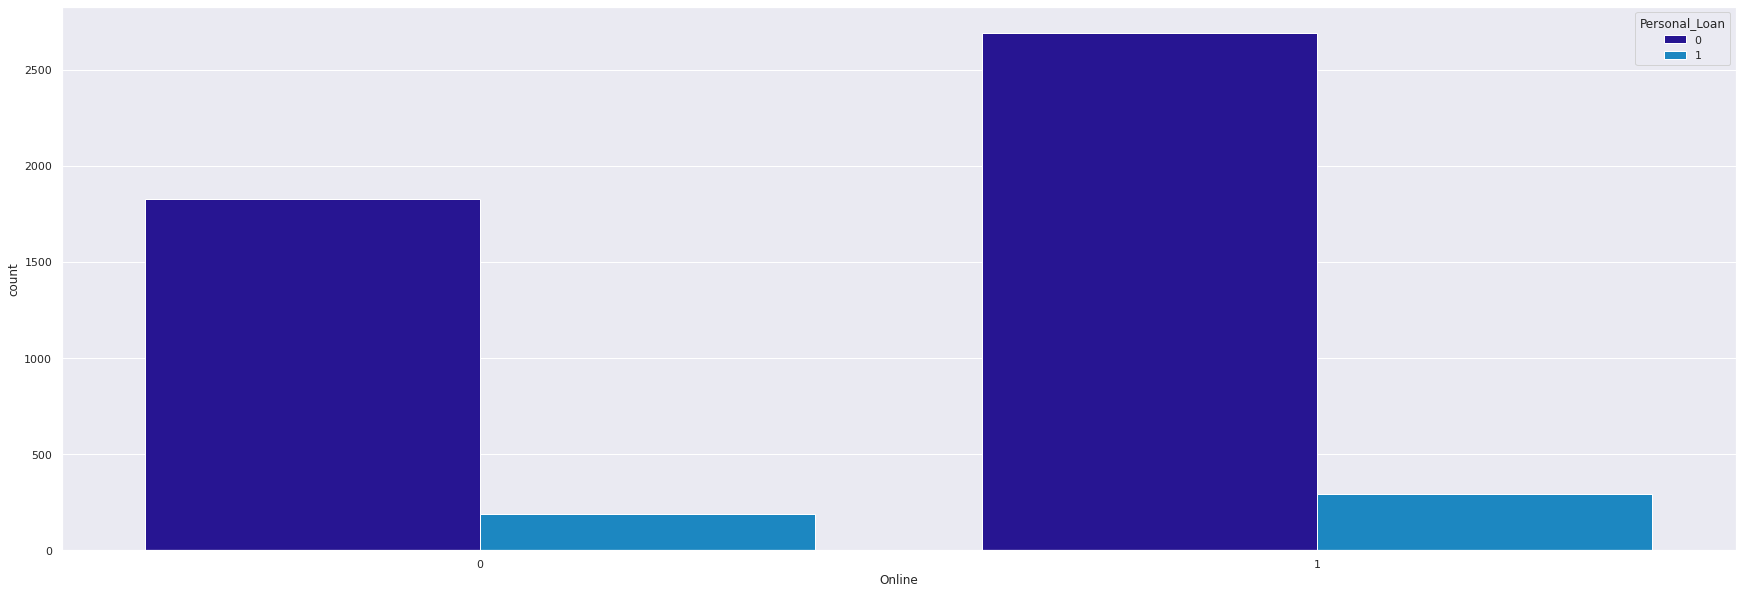

In [330]:
plt.figure(figsize=(30,10))
sns.countplot(x="Online", hue="Personal_Loan", data=loanData)
plt.show()

1) There is a very low correlation between Online and Personal Loan.

2) Customer's irrespective of online account or not, have very low acceptance rate of Personal Loan in the past. 

## Analysis of Customer base in general. 

### `Income vs CCAvg`

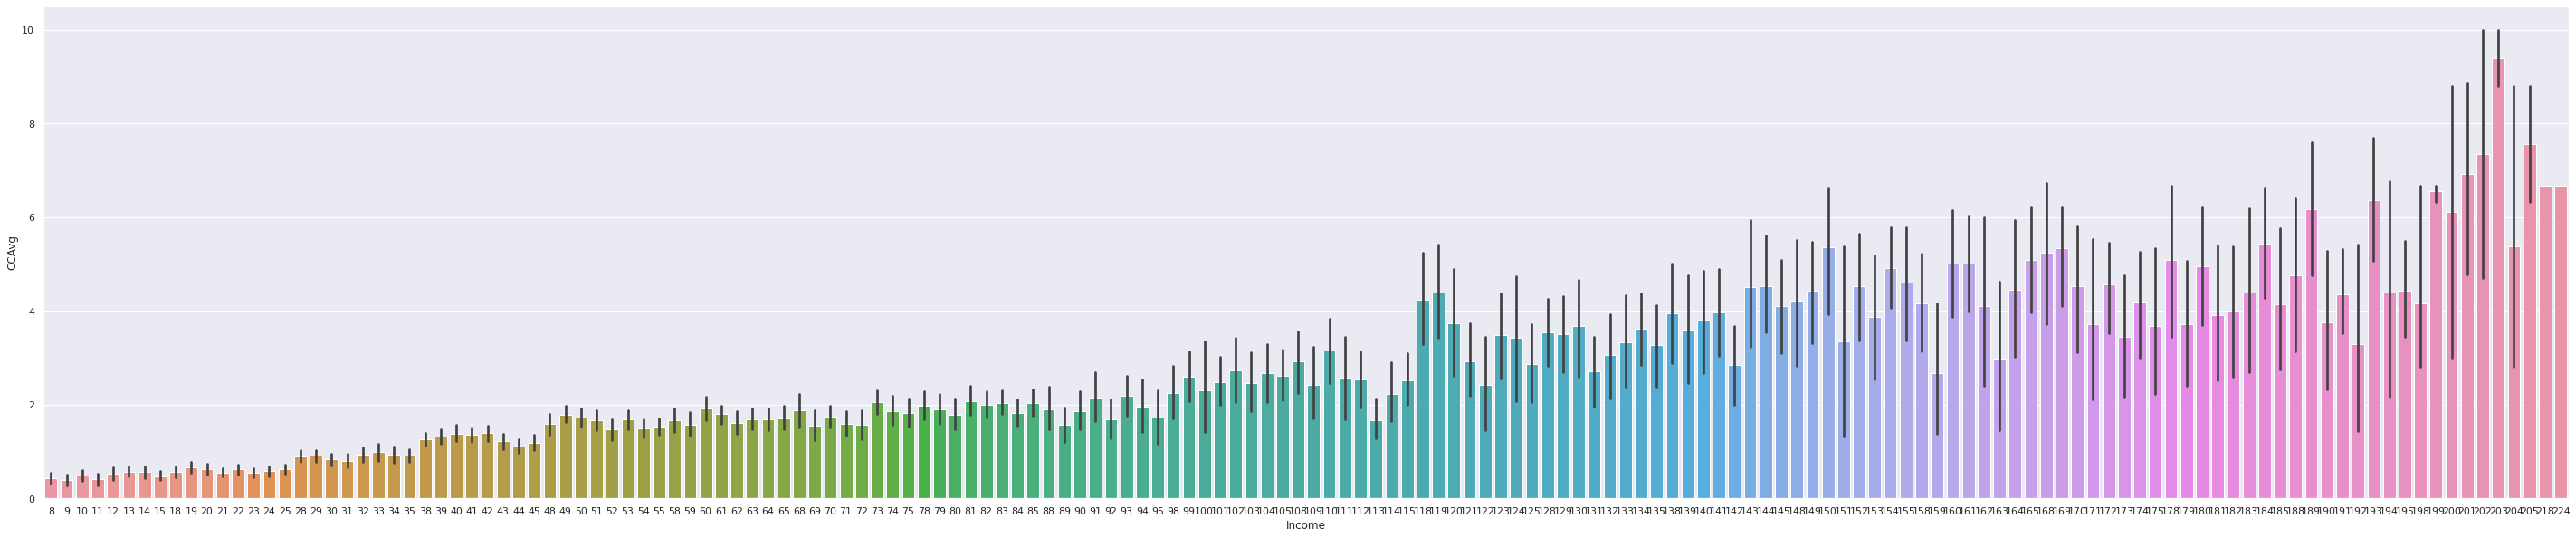

In [331]:
plt.figure(figsize=(50,10))
sns.barplot(x="Income", y="CCAvg", data=loanData)
plt.show()

In General as Income of customer increases, their Credit Card balance also increases. 

### `Age vs Experience` 

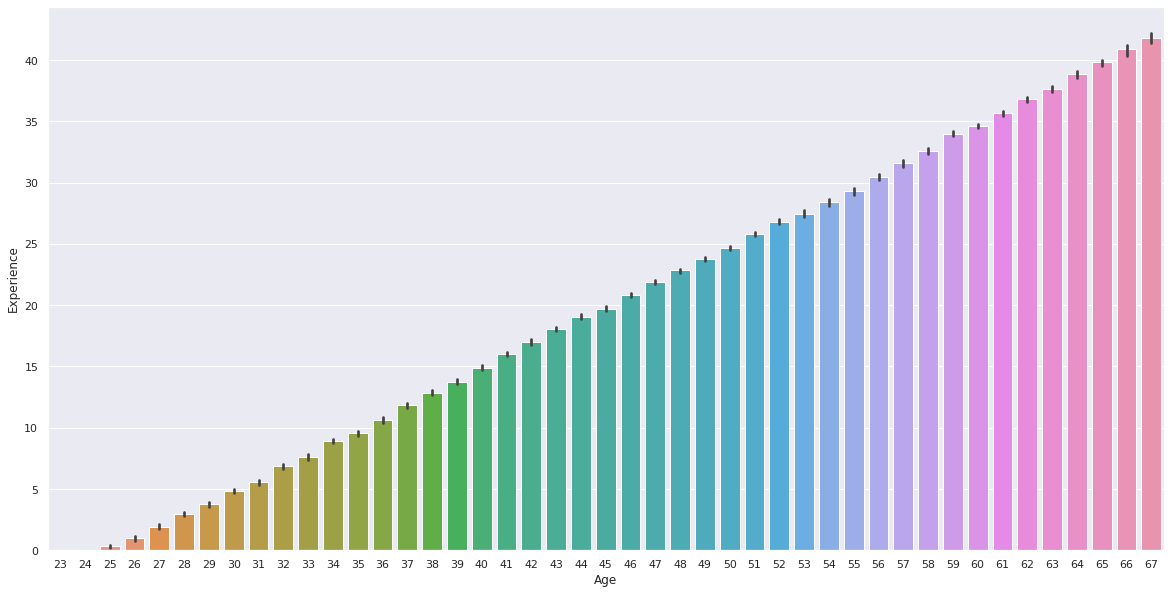

In [332]:
plt.figure(figsize=(20,10))
sns.barplot(x="Age", y="Experience", data=loanData)
plt.show()

For most part there's a linear correlation between Age & Experience. However there's clearly some outliers in experience, with customer less 28 years. This is most definetly error and should be corrected. Need to analyze data at a micro level (Customer's with age less than 28)

In [333]:
df = loanData[loanData["Age"] < 28]
df.describe().T

count          mean          std      min      25%  \
Age                 262.0     25.793893     1.162752     23.0     25.0   
Experience          262.0      1.026718     1.077127      0.0      0.0   
Income              262.0     77.648855    44.742588      8.0     42.0   
ZIPCode             262.0  93317.442748  1769.622908  90009.0  92093.0   
Family              262.0      2.725191     1.121394      1.0      2.0   
CCAvg               262.0      1.983626     1.721792      0.0      0.9   
Education           262.0      1.870229     0.843246      1.0      1.0   
Mortgage            262.0     62.095420   107.406568      0.0      0.0   
Personal_Loan       262.0      0.095420     0.294356      0.0      0.0   
Securities_Account  262.0      0.125954     0.332433      0.0      0.0   
CD_Account          262.0      0.041985     0.200938      0.0      0.0   
Online              262.0      0.538168     0.499495      0.0      0.0   
CreditCard          262.0      0.274809     0.447272      0.0      0.0   

                        50%       75%      max  
Age                    26.0     27.00     27.0  
Experience              1.0      2.00      3.0  
Income                 72.0    108.00    205.0  
ZIPCode             93835.0  94717.50  96651.0  
Family                  3.0      4.00      4.0  
CCAvg                   1.6      2.40      7.2  
Education               2.0      3.00      3.0  
Mortgage                0.0    112.75    577.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [334]:
df.groupby(["Age"]).Experience.aggregate(["min", np.median, np.mean, "max"]).head(100)

min  median      mean  max
Age                            
23   0.0     0.0  0.000000  0.0
24   0.0     0.0  0.000000  0.0
25   0.0     0.0  0.339623  1.0
26   0.0     1.0  0.974359  2.0
27   0.0     2.0  1.923077  3.0

1) Looking above it's very clear that there are lot of customers under 28 Years of Age with experience as 20.605899. 

2) I can also conclude that none of the customers in the Age category of 23 & 24 had valid experience. Hence I will replace that with 0.

In [335]:
df[df["Age"] == 23 ].head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
670    23         0.0      61    92374       4   2.60          1       239   
909    23         0.0     149    91709       1   6.33          1       305   
2430   23         0.0      73    92120       4   2.60          1         0   
2618   23         0.0      55    92704       3   2.40          2       145   
2717   23         0.0      45    95422       4   0.60          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
670               0                   0           0       1           0  
909               0                   0           0       0           1  
2430              0                   0           0       1           0  
2618              0                   0           0       1           0  
2717              0                   0           0       1           1

In [337]:
## Actual and complete value of Experience that needs to be imputed is 20.60589922163048
df["Experience"] = df["Experience"].apply(lambda x : 0 if (x == 20.60589922163048) else x)
df[df["Experience"] == 20.60589922163048].head()
#df.groupby(["Age"]).Experience.aggregate(["min", np.median, np.mean, "max"]).head(100)

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

### `Mortagage vs Income` 

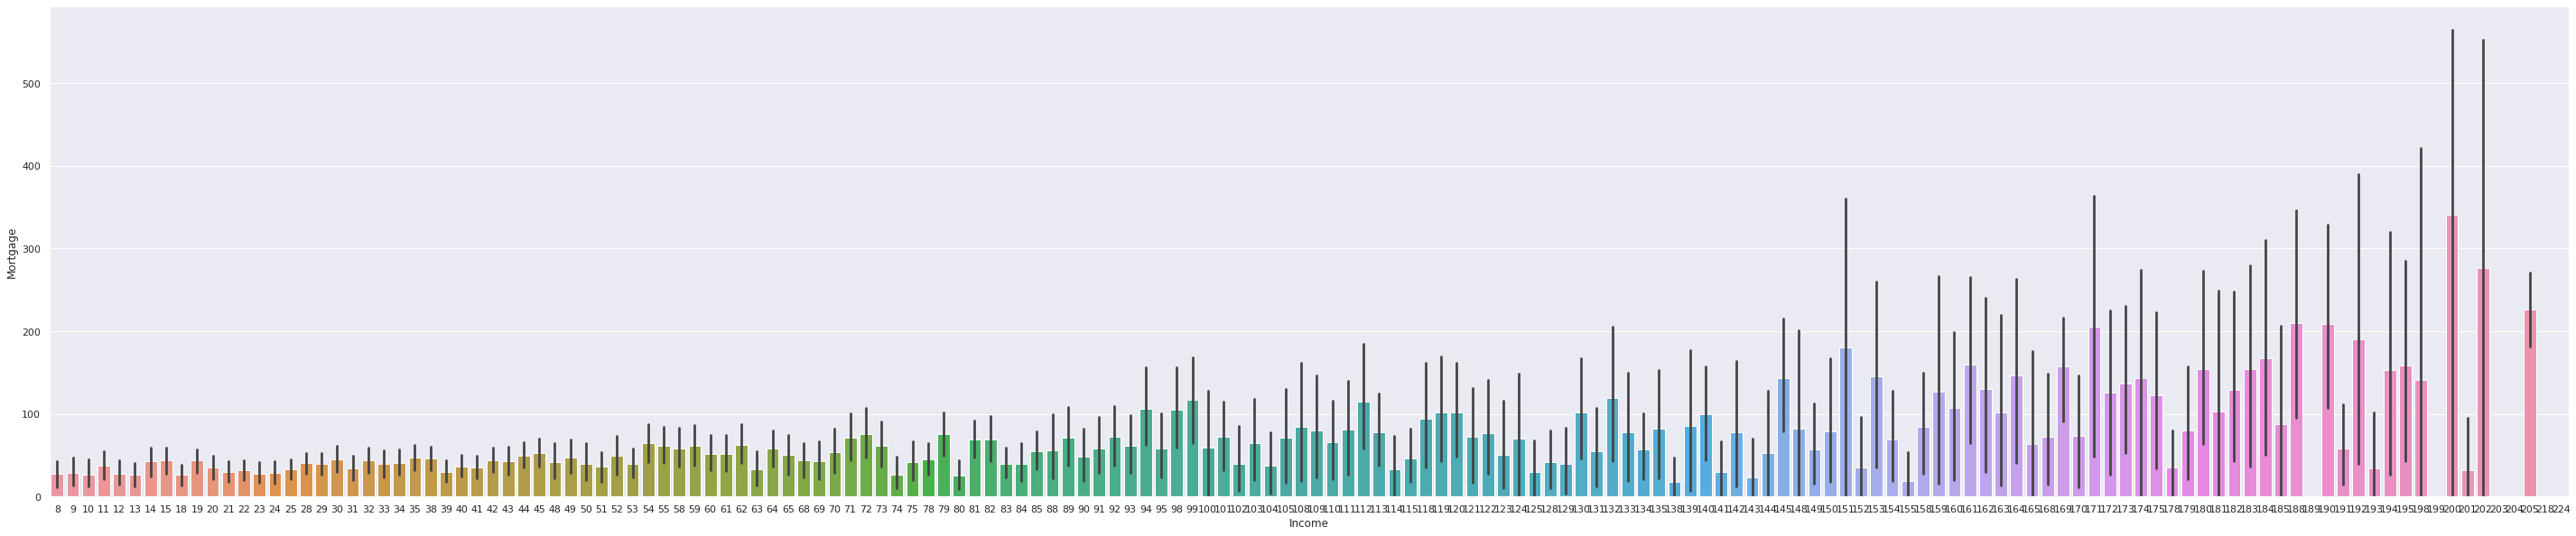

In [339]:
plt.figure(figsize=(50,10))
sns.barplot(x="Income", y="Mortgage", data=loanData)
plt.show()

As Income of the customers increases their Mortgage Value also tend to increase, as shown in the graph above. 

### `Credit Card vs CD Account` 

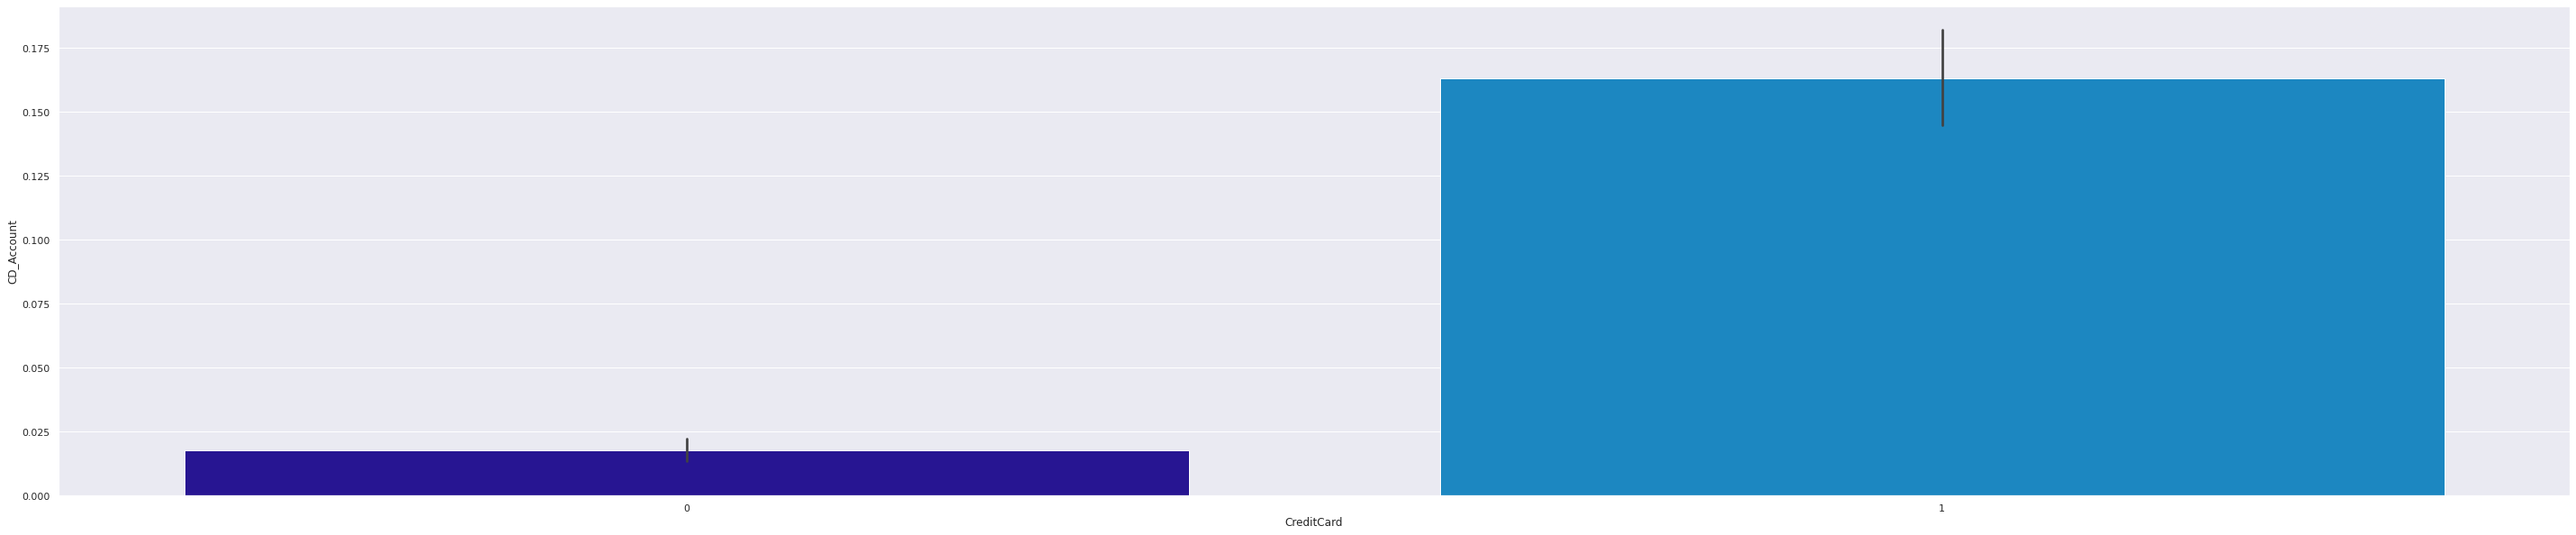

In [342]:
plt.figure(figsize=(50,10))
sns.barplot(x="CreditCard", y="CD_Account", data=loanData)
plt.show()

This is interesting data point. It looks like Customers who have Credit Card from other banks still tends to have Certificate of Deposit account with All Life Bank.

### Summary of EDA
**Data Description:**

- There were no duplicates records in the dataset. 
- There are no missing values in the data.
- All the features are either integer or float.


**Observations from EDA:**

1) Customer population varies from minimum of 23 years to a max 67 Years, with mean customer age as 45.33. 

2) Experience and Age very strongly correlates. Hence we can drop one of those inorder to avoid creating bias in the model.

3) Income of customer base varies from 8K Dollars per month to 224K Dollars per Month. There's a huge variation in the income distribution with possible outliers. (Skeweness in data)

4) Zipcode. Most of zipcode (75%) belong to state of California. I made this conclusion because zip code range (min and 75% ) belong to State of California based on <a href="http://www.structnet.com/instructions/zip_min_max_by_state.html">this</a> public data. However there may be few out of range zipcodes for California state. 

5) Customer demographics shows that there around 30% of customer are single, 25% of customers have Family 2, 20% of customers have family of 3 while 25% of customer have Family of 4.

6) Most of the customers almost 70% (3462 out of 5000) don't have any mortgages.

7) Most of the customers (90%) didn't accept the Personal_Loan offered in the last campaign. Personal loan acceptance rate in the past has been low across all different age groups. Yougest customers to have accept the Personal Loan offer is 26 while older customers are of 65 years.

8) Most of the customers (almost 90%) don't have security account with the bank. 

9) Very high number of customers (94%) didn;t have Certificate of Deposit account with the bank. 

10) 60% of the customer's have online account with the bank.

11) 70% of the customer's don't have Credit Card with another bank.

12) Customers with higher Income tend to have accepted Personal Loan Offer in the past. 

13) Customer with higher Credit Card Balance tend to have accepted Personal Loan offer in the past

14) Customers with Higher Mortgage value tend to have accepted the Personal Loan in the past. 

15) Customers with higher level of education tend to have accepted the Personal Loan Offer in the past. 

16) Customers with or without online account with the bank alike have low acceptance rate for the Personal Loan. 

17) In General as Income of customer increases, their Credit Card balance also increases. 

18) As Income of the customers increases their Mortgage Value also tend to increase, as shown in the graph above. 

**Actions for data preparation:**

- Drop the ID field, as its not adding any value in the dataset. 
- Drop Experience from the dataset, since its highly correlated with Age. 
- Drop ZipCode from the dataset as well, just because I won't be able to use it very effectively since they are too many and customers are very well spread across zipcodes. 

## 4)  Data Preparation  

In [446]:
loanData.drop(["ID","Experience","ZIPCode"], axis=1, inplace=True)
loanData.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard'],
      dtype='object')

In [447]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    loanData,
    columns=[
        "Family",
        "Education"
    ],
    drop_first=True,
)
dummy_data.head()

Age  Income  CCAvg  Mortgage  Personal_Loan  Securities_Account  \
0   25      49    1.6         0              0                   1   
1   45      34    1.5         0              0                   1   
2   39      11    1.0         0              0                   0   
3   35     100    2.7         0              0                   0   
4   35      45    1.0         0              0                   0   

   CD_Account  Online  CreditCard  Family_2  Family_3  Family_4  Education_2  \
0           0       0           0         0         0         1            0   
1           0       0           0         0         1         0            0   
2           0       0           0         0         0         0            0   
3           0       0           0         0         0         0            1   
4           0       0           1         0         0         1            1   

   Education_3  
0            0  
1            0  
2            0  
3            0  
4            0

In [347]:
zipcode = pd.read_csv("zip_code_database.csv")
zipcode.head()

zip primary_city state               county  irs_estimated_population_2015
0  501   Holtsville    NY       Suffolk County                            562
1  544   Holtsville    NY       Suffolk County                              0
2  601     Adjuntas    PR   Adjuntas Municipio                              0
3  602       Aguada    PR     Aguada Municipio                              0
4  603    Aguadilla    PR  Aguadilla Municipio                              0

In [541]:
zipcode_ca = zipcode[zipcode["state"] == "CA"]
zipcode_ca.rename(columns={"zip": "ZIPCode"}, inplace=True)
zipcode_ca.drop(["state","primary_city","irs_estimated_population_2015"], inplace=True, axis=1)
zipcode_ca.head()


ZIPCode              county
38117    90001  Los Angeles County
38118    90002  Los Angeles County
38119    90003  Los Angeles County
38120    90004  Los Angeles County
38121    90005  Los Angeles County

In [565]:
loanDataBKP = loanData.copy()
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [566]:
loanDataBKP = loanDataBKP.merge(zipcode_ca, how='left')
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [567]:
loanDataBKP[loanDataBKP["county"].isnull()].count()

ID                    34
Age                   34
Experience            34
Income                34
ZIPCode               34
Family                34
CCAvg                 34
Education             34
Mortgage              34
Personal_Loan         34
Securities_Account    34
CD_Account            34
Online                34
CreditCard            34
county                 0
dtype: int64

In [568]:
loanDataBKP["county"] = loanDataBKP.apply(lambda x : "Other" if (pd.isnull(x["county"])) else x["county"], axis=1)
loanDataBKP[loanDataBKP["county"].isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
county                0
dtype: int64

In [569]:
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [576]:
groupbycounty = loanDataBKP.county.value_counts()
groupbycountydf = pd.DataFrame({'county':groupbycounty.index, 'counter':groupbycounty.values})
print(groupbycountydf)

                    county  counter
0       Los Angeles County     1095
1         San Diego County      568
2       Santa Clara County      563
3           Alameda County      500
4            Orange County      339
5     San Francisco County      257
6         San Mateo County      204
7        Sacramento County      184
8     Santa Barbara County      154
9              Yolo County      130
10         Monterey County      128
11          Ventura County      114
12   San Bernardino County      101
13     Contra Costa County       85
14       Santa Cruz County       68
15        Riverside County       56
16            Marin County       54
17             Kern County       54
18                   Other       34
19           Solano County       33
20  San Luis Obispo County       33
21         Humboldt County       32
22           Sonoma County       28
23           Fresno County       26
24           Placer County       24
25            Butte County       19
26           Shasta County  

In [582]:
def getCounty(county):
      row = groupbycountydf[groupbycountydf["county"] == county]  
      row.type
      print("count -> ", row["count"].item(), " county - > ", row["county"])  
      if(row.counter > 100):
            return row.county
      else:
           return "Other"   
 
loanDataBKP["county"] = loanDataBKP.apply(lambda x : getCounty(x["county"]), axis=1)


AttributeError: 'DataFrame' object has no attribute 'type'

In [579]:
getCounty("Los Angeles County")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [562]:
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

               county  
0  Los Angeles County  
1  Los Angeles County  
2                 NaN  
3                 NaN  
4  Los Angeles County

In [518]:
row = groupbycountydf[groupbycountydf["ZIPCode"] == 91107]  
print(row["county"])

37    Other
Name: county, dtype: object


In [453]:
loanDataBKP = loanData.copy()
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [454]:
loanDataBKP = loanDataBKP.merge(zipcode_ca, how='left')
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [455]:
loanDataBKP["county"] = loanDataBKP.apply( lambda x : "Other" if pd.isnull(x["county"]) else x["county"], axis=1)
loanDataBKP.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

In [409]:
loanDataBKP[loanDataBKP["county"] == "Other"].head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
106  107   43          17      69    92717       4    2.9          1   
172  173   38          13     171    92717       2    7.8          1   
184  185   52          26      63    92717       2    1.5          2   
321  322   44          20     101    92717       3    4.4          2   
366  367   50          24      35    92717       1    0.3          3   

     Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
106         0              0                   0           0       1   
172         0              0                   0           0       1   
184         0              0                   1           0       1   
321        82              1                   0           0       0   
366         0              0                   0           0       1   

     CreditCard primary_city county  irs_estimated_population_2015  
106           1        Other  Other                            0.0  
172           0        Other  Other                            0.0  
184           0        Other  Other                            0.0  
321           0        Other  Other                            0.0  
366           0        Other  Other                            0.0

In [438]:
loanDataBKP.isnull().any()

ID                               False
Age                              False
Experience                       False
Income                           False
ZIPCode                          False
Family                           False
CCAvg                            False
Education                        False
Mortgage                         False
Personal_Loan                    False
Securities_Account               False
CD_Account                       False
Online                           False
CreditCard                       False
primary_city                     False
county                           False
irs_estimated_population_2015    False
dtype: bool

In [445]:
groupbyval = loanDataBKP.county.value_counts()
#groupbyval = pd.DataFrame({'county':groupbyval.index, 'count':groupbyval.values})
print(groupbyval)



Los Angeles County       1095
Other                     663
San Diego County          568
Santa Clara County        563
Alameda County            500
Orange County             339
San Francisco County      257
San Mateo County          204
Sacramento County         184
Santa Barbara County      154
Yolo County               130
Monterey County           128
Ventura County            114
San Bernardino County     101
Name: county, dtype: int64


In [444]:
def checkCountyCount(county):
    if groupbyval[county] < 100:
        return "Other"
    else :
        return county
    

loanDataBKP["county"] = loanDataBKP.apply(lambda x : "Other" if (groupbyval[x["county"]] < 100 )  else x["county"], axis=1)